# 2. EDA
___

### Background  

In 2023 6.5 million cats and dogs entered animal shelters in the US.
* 3.3 million cats
* 3.2 million dogs
4.8 million were adopted
* 2.6 million cats
* 2.2 million dogs
  
850,000 animals were euthanized, lost, or died in care.
<br> 
690,000 animals were euthanized.

There are 14,429 animal shelters in America.  9514 are rescue organizations and 4915 are government funded animal shelters. -[www.shelteranimalscount.org](https://www.shelteranimalscount.org/stats)

Some of the biggest problems facing these organizations are overcrowding(1), lack of access to medical services (1), funding shortfalls (2) and staffing shortages (3).

[(1)bissellpetfoundation.org](https://www.bissellpetfoundation.org/news/shelter-crisis-2022/#)
<br>
[(2)pmc.ncbi.nlm.nih.gov](https://pmc.ncbi.nlm.nih.gov/articles/PMC3398531/#:~:text=Insufficient%20levels%20of%20funding%20support,standardized%20inspection%20of%20shelter%20facilities)
<br>
[(3)nationalgeographic.com](https://www.nationalgeographic.com/animals/article/why-animal-shelters-are-facing-a-new-crisis#:~:text=Many%20shelters%20helping%20dogs%2C%20cats,didn't%20deserve%20this.%22&text=Newly%20washed%20dog%20bowls%20and,prep%20room%20at%20the%20shelter)


While we can't affect monetary issues (funding and staffing shortages) we have some recommendations to address all of these issues.  

By understanding which animals need the most assistance, resources can be pooled by transfering an animal earlier.

Improving coordination with vetinary schools to increase access to medical services.

By examining different data collection processed we can find what data collection improves an animals outcome.

___
### Intention
While we can't affect monetary issues (funding and staffing shortages) we are looking for insights that will have an impact on these issues. By understanding which animals need the most assistance, resources can be pooled by transferring an animal earlier. By examining different data collection processes we can find what data collection improves an animal's outcome.

___  
Over this section the data will be explored:  

* Data Familiarization - Check feature names, size, and shape
* Summary Statistics - Review and check for relationships if any
* Feature Exploration - Examine individual features and aggregations
* Create Visuals - Summary findings with visuals
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style for notebook
plt.style.use('bmh')

## Austin

In [2]:
animals_austin = pd.read_csv('../data/austin-data.csv', parse_dates = ['outcome_time', 'intake_time', 'date_of_birth'])
animals_austin.head()

,animal_id,outcome_time,date_of_birth,outcome_type,outcome_gender,outcome_age,intake_time,found_location,intake_type,intake_condition,animal_type,intake_gender,intake_age,breed,color,stay,repeat,animal_stay,stay_duration,spay_neuter
0,A912799,2024-10-17 13:07:00,2024-07-21,Adoption,Spayed Female,2.0,2024-09-05 14:57:00,7201 Levander Loop in Austin (TX),Abandoned,Normal,Cat,Intact Female,1.0,Domestic Shorthair,Brown Tabby,1,0,A912799-1,41,1
1,A912055,2024-10-17 12:25:00,2023-10-25,Adoption,Neutered Male,11.0,2024-08-25 08:20:00,1800 Fairlawn Lane in Austin (TX),Stray,Injured,Cat,Intact Male,10.0,Domestic Shorthair,Brown Tabby/White,1,0,A912055-1,53,1
2,A915002,2024-10-17 12:21:00,2023-10-10,Return to Owner,Intact Male,12.0,2024-10-10 12:10:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,12.0,German Shepherd Mix,Tan,1,0,A915002-1,7,0
3,A912548,2024-10-17 11:45:00,2021-09-02,Adoption,Neutered Male,36.0,2024-09-02 22:31:00,6900 Bryn Mawr in Austin (TX),Stray,Normal,Dog,Intact Male,36.0,Siberian Husky Mix,Black/White,1,0,A912548-1,44,1
4,A915279,2024-10-17 00:00:00,2022-10-14,Transfer,Intact Female,24.0,2024-10-14 11:47:00,14514 Highsmith Street in Austin (TX),Stray,Normal,Cat,Intact Female,24.0,Domestic Shorthair,Black,1,0,A915279-1,2,0


In [3]:
# sort data ascending
animals_austin.sort_values(by = 'intake_time', inplace = True)

In [4]:
animals_austin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156664 entries, 127041 to 20
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id         156664 non-null  object        
 1   outcome_time      156664 non-null  datetime64[ns]
 2   date_of_birth     156664 non-null  datetime64[ns]
 3   outcome_type      156664 non-null  object        
 4   outcome_gender    156664 non-null  object        
 5   outcome_age       156664 non-null  float64       
 6   intake_time       156664 non-null  datetime64[ns]
 7   found_location    156664 non-null  object        
 8   intake_type       156664 non-null  object        
 9   intake_condition  156664 non-null  object        
 10  animal_type       156664 non-null  object        
 11  intake_gender     156664 non-null  object        
 12  intake_age        156664 non-null  float64       
 13  breed             156664 non-null  object        
 14  color   

In [5]:
animals_austin.describe()

,outcome_time,date_of_birth,outcome_age,intake_time,intake_age,stay,repeat,stay_duration,spay_neuter
count,156664,156664,156664.000000,156664,156664.000000,156664.000000,156664.000000,156664.000000,156664.000000
mean,2018-09-22 04:42:14.499055360,2016-08-08 03:47:56.065975808,24.166488,2018-09-02 09:39:12.263570688,23.657581,1.147781,0.189010,19.400698,0.431069
min,2013-10-01 10:39:00,1992-06-25 00:00:00,0.000000,2013-10-01 07:51:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2016-01-19 16:57:00,2014-02-17 00:00:00,2.000000,2016-01-03 16:21:00,1.150000,1.000000,0.000000,2.000000,0.000000
50%,2018-06-24 19:11:00,2016-09-09 00:00:00,12.000000,2018-06-05 11:17:00,12.000000,1.000000,0.000000,6.000000,0.000000
75%,2021-05-14 14:52:15,2019-08-22 00:00:00,24.000000,2021-04-23 16:13:00,24.000000,1.000000,0.000000,20.000000,1.000000
max,2024-10-17 13:07:00,2024-10-07 00:00:00,288.000000,2024-10-16 14:50:00,288.000000,33.000000,1.000000,365.000000,1.000000
std,NaN,NaN,34.309692,NaN,34.255870,0.566218,0.391517,35.894930,0.495227


In [6]:
# count how many cats and dogs taken in each year
year_outcomes = animals_austin['animal_id'].groupby(animals_austin['outcome_time'].dt.year).count()
year_outcomes

outcome_time
2013     3438
2014    17379
2015    17568
2016    16513
2017    16454
2018    15737
2019    18794
2020     8974
2021    11172
2022    11114
2023    10524
2024     8997
Name: animal_id, dtype: int64

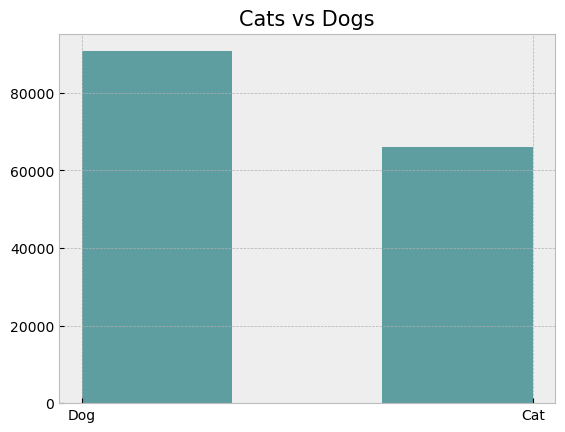

In [7]:
# see numbers for cats and dogs overall
plt.hist(animals_austin['animal_type'], bins = 3, color = 'cadetblue')
plt.title('Cats vs Dogs', size = 15);

In [8]:
# count how many cats and dogs successfully rehomed
success = animals_austin[(animals_austin['outcome_type'] == 'Adoption') | (animals_austin['outcome_type'] == 'Return to Owner') | (animals_austin['outcome_type'] == 'Rto-Adopt')]
year_success = success['animal_id'].groupby(animals_austin['outcome_time'].dt.year).count()
year_success

outcome_time
2013     2003
2014    10245
2015    10810
2016    11181
2017    11254
2018    10877
2019    12368
2020     6181
2021     8023
2022     7812
2023     7389
2024     6486
Name: animal_id, dtype: int64

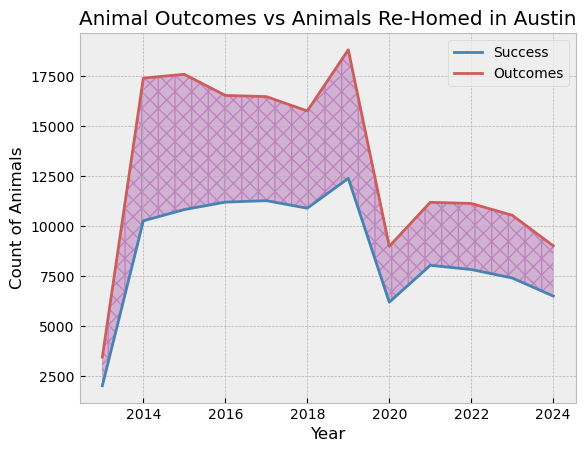

In [9]:
# visualize success vs failures
fig, ax = plt.subplots()
ax.plot(year_success.index, year_success.values, color='steelblue', label='Success')
ax.plot(year_outcomes.index, year_outcomes.values, color='indianred', label='Outcomes')

ax.fill_between(year_success.index, year_success, year_outcomes, alpha=0.25, color='purple', hatch='/\\/\\|')
ax.set_title('Animal Outcomes vs Animals Re-Homed in Austin')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Animals')
ax.legend(loc='best')

plt.show();

# saving image for slides
fig.tight_layout()
fig.savefig('../images/compare_outcomes_austin.png')

In [10]:
# which breeds return the most
repeat_breeds = animals_austin[animals_austin['repeat'] == 1]['breed'].value_counts(normalize=True)*100
repeat_breeds_10 = repeat_breeds.head(10)
repeat_breeds_10

breed
Pit Bull Mix                 12.735132
Domestic Shorthair Mix       10.918240
Labrador Retriever Mix        7.821418
Chihuahua Shorthair Mix       4.525345
Domestic Shorthair            4.380129
German Shepherd Mix           3.714836
Pit Bull                      2.873932
Australian Cattle Dog Mix     1.644659
German Shepherd               1.539968
Boxer Mix                     1.327209
Name: proportion, dtype: float64

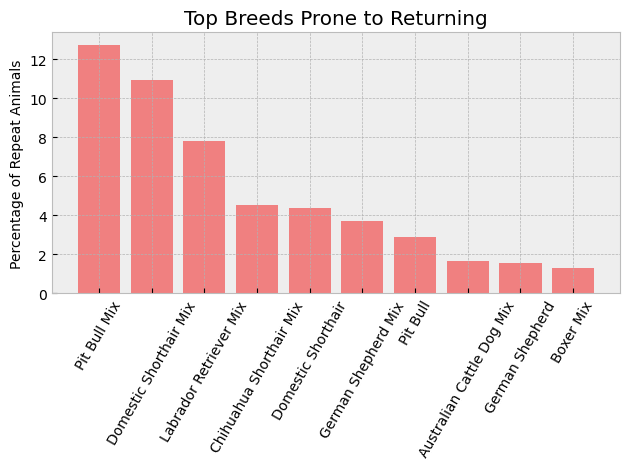

In [11]:
# Visual for top breeds
plt.bar(x=repeat_breeds_10.index, height=repeat_breeds_10.values, color='lightcoral')

plt.title('Top Breeds Prone to Returning')
plt.xticks(rotation = 60, size=10)
plt.ylabel('Percentage of Repeat Animals', size=10)

# saving plot for slides
plt.tight_layout()
plt.savefig('../images/breeds_prone_repeats.png')

plt.show();

In [12]:
# breed breakdowns
breeds = animals_austin['breed'].value_counts(normalize=True)*100
breeds.head(10)

breed
Domestic Shorthair Mix       21.385896
Domestic Shorthair           13.685978
Pit Bull Mix                  6.219680
Labrador Retriever Mix        5.401369
Chihuahua Shorthair Mix       4.351351
German Shepherd Mix           2.514936
Domestic Medium Hair Mix      2.119185
Pit Bull                      1.980672
Australian Cattle Dog Mix     1.228106
Domestic Medium Hair          1.226191
Name: proportion, dtype: float64

In [13]:
# summarizing info about breeds relationship to repeat animals
breed_repeat_ratio = pd.DataFrame({'repeats': repeat_breeds, 'breeds':breeds})
breed_repeat_ratio.fillna(value=0, inplace=True)

In [14]:
# identifying the breeds that are over represented as repeat animals
breed_repeat_ratio['over_represented'] = breed_repeat_ratio['repeats'] - breed_repeat_ratio['breeds']
over_rep_10 = breed_repeat_ratio.sort_values(by='over_represented', ascending=False).head(10)
over_rep_10

,repeats,breeds,over_represented
breed,,,
Pit Bull Mix,12.735132,6.219680,6.515452
Labrador Retriever Mix,7.821418,5.401369,2.420049
German Shepherd Mix,3.714836,2.514936,1.199899
Pit Bull,2.873932,1.980672,0.893260
Staffordshire Mix,1.229273,0.497881,0.731392
Boxer Mix,1.327209,0.729587,0.597623
American Bulldog Mix,0.851035,0.357453,0.493582
German Shepherd,1.539968,1.084487,0.455482
Siberian Husky Mix,1.040154,0.596819,0.443335


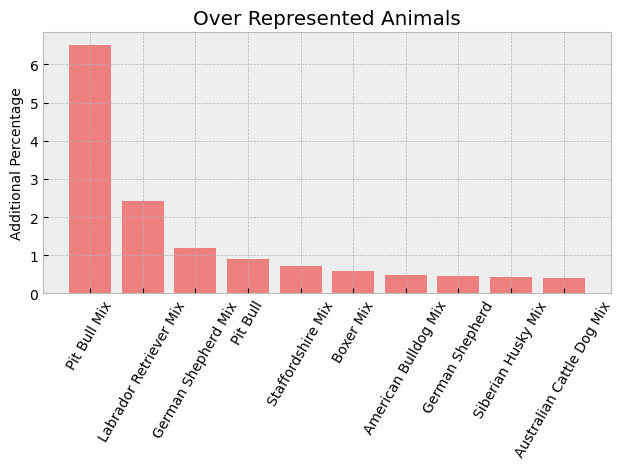

In [15]:
# Visual for over-represented breeds
plt.bar(x=over_rep_10.index, height=over_rep_10['over_represented'], color='lightcoral')

plt.title('Over Represented Animals')
plt.xticks(rotation = 60, size=10)
plt.ylabel('Additional Percentage', size=10)

# saving plot for slides
plt.tight_layout()
plt.savefig('../images/breeds_over_represented.png')

plt.show();

In [16]:
# which intake types return the most
animals_austin[animals_austin['repeat'] == 1]['intake_type'].value_counts(normalize=True).head(10)

intake_type
Stray                 0.529702
Owner Surrender       0.371484
Public Assist         0.091858
Abandoned             0.006281
Euthanasia Request    0.000675
Name: proportion, dtype: float64

In [17]:
# what percentage of strays are repeats
animals_austin[animals_austin['intake_type'] == 'Stray']['repeat'].value_counts(normalize=True).head(10)

repeat
0    0.860657
1    0.139343
Name: proportion, dtype: float64

In [18]:
# what condition do repeats come in?
animals_austin[animals_austin['repeat'] == 1]['intake_condition'].value_counts(normalize=True).head(10)

intake_condition
Normal      0.939144
Injured     0.032218
Sick        0.016953
Nursing     0.003580
Aged        0.002465
Medical     0.001824
Other       0.001182
Behavior    0.001013
Pregnant    0.000540
Neonatal    0.000540
Name: proportion, dtype: float64

In [19]:
# breakdown of intakes
bd_intakes = animals_austin['intake_type'].value_counts(normalize=True)
bd_intakes

intake_type
Stray                 0.718506
Owner Surrender       0.209780
Public Assist         0.059612
Abandoned             0.010551
Euthanasia Request    0.001545
Wildlife              0.000006
Name: proportion, dtype: float64

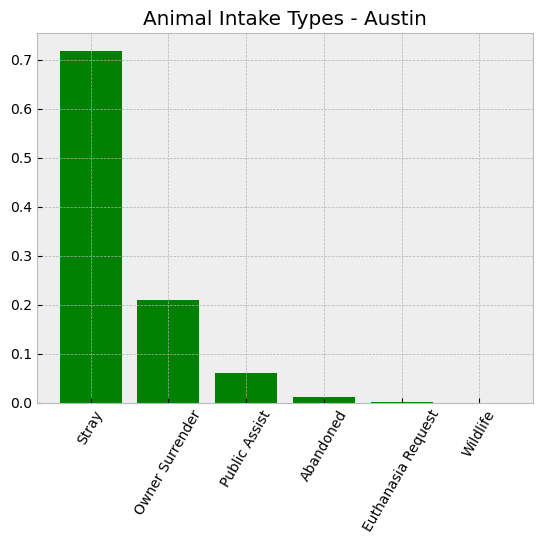

In [20]:
# visualize the breakdown of intakes
plt.bar(x=bd_intakes.index, height=bd_intakes.values, color='green')

plt.title('Animal Intake Types - Austin')
plt.xticks(rotation = 60)

plt.show();

In [21]:
# breakdown of outcomes
bd_outcomes = animals_austin['outcome_type'].value_counts(normalize=True)
bd_outcomes

outcome_type
Adoption           0.500747
Transfer           0.292626
Return to Owner    0.159558
Euthanasia         0.028883
Died               0.008477
Rto-Adopt          0.007551
Disposal           0.001551
Missing            0.000523
Relocate           0.000038
Stolen             0.000032
Lost               0.000013
Name: proportion, dtype: float64

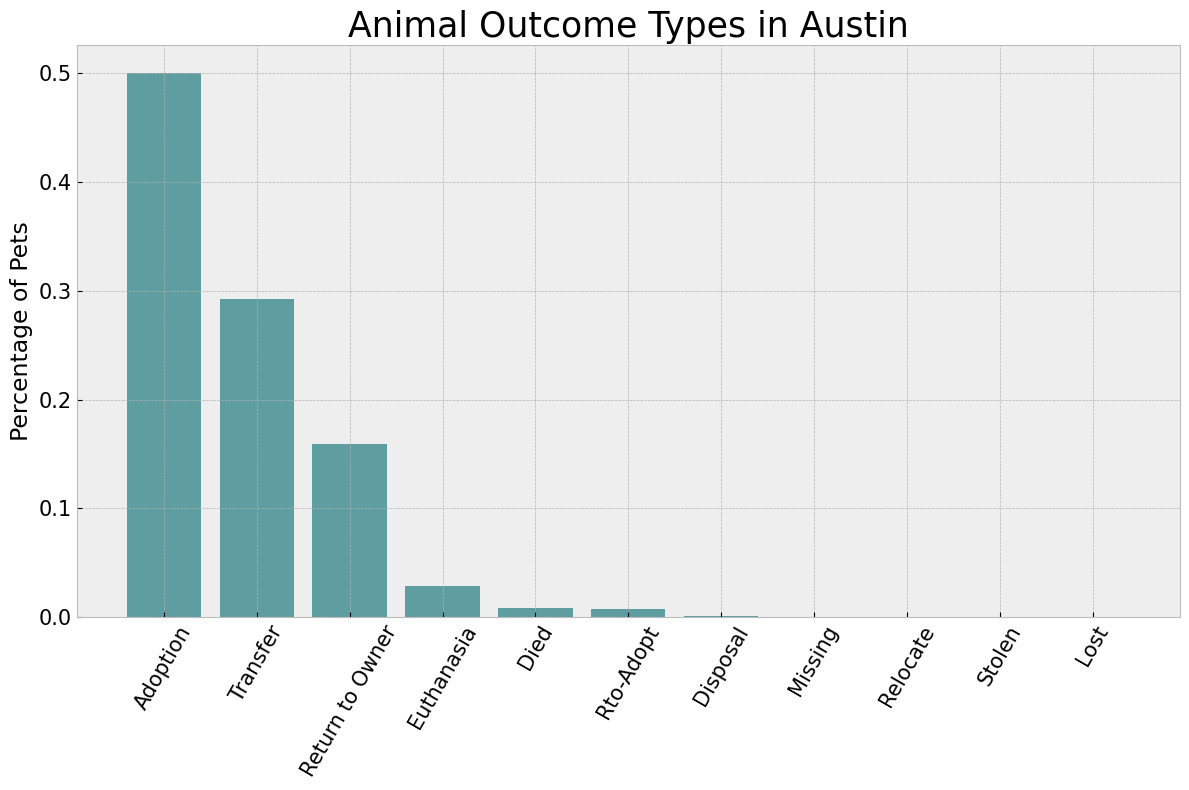

In [22]:
# visualize the breakdown of outcomes
plt.figure(figsize = (12, 8))
plt.bar(x=bd_outcomes.index, height=bd_outcomes.values, color = 'cadetblue')

plt.title('Animal Outcome Types in Austin', size = 25)
plt.xticks(rotation = 60, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage of Pets', size = 17);

# saving plot for slides
plt.tight_layout()
plt.savefig('../images/all_outcomes_austin.png')

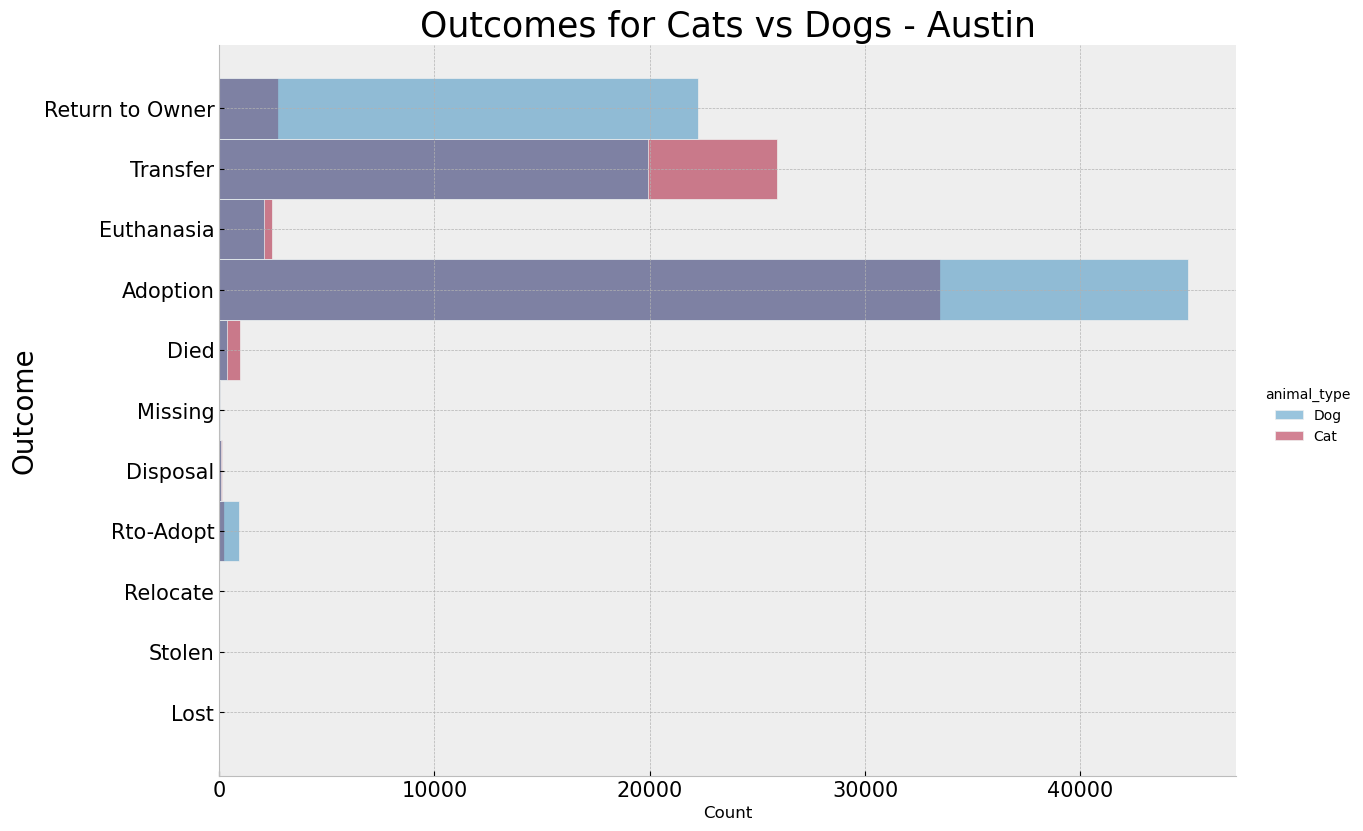

In [23]:
# show distribution of cats vs dogs for each outcome
sns.displot(animals_austin, y='outcome_type', hue='animal_type', height=8, aspect=1.5)
plt.title('Outcomes for Cats vs Dogs - Austin', size=25)
plt.ylabel('Outcome', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

*A lot more dogs came to a shelter lost and were returned to their owner. There are more dog observations so it makes sense there are more dog adoptions, but there are more cats that get transferred. There are also more cats that are euthanised or die while at the shelter. Checking the intake condition for those two outcomes.*

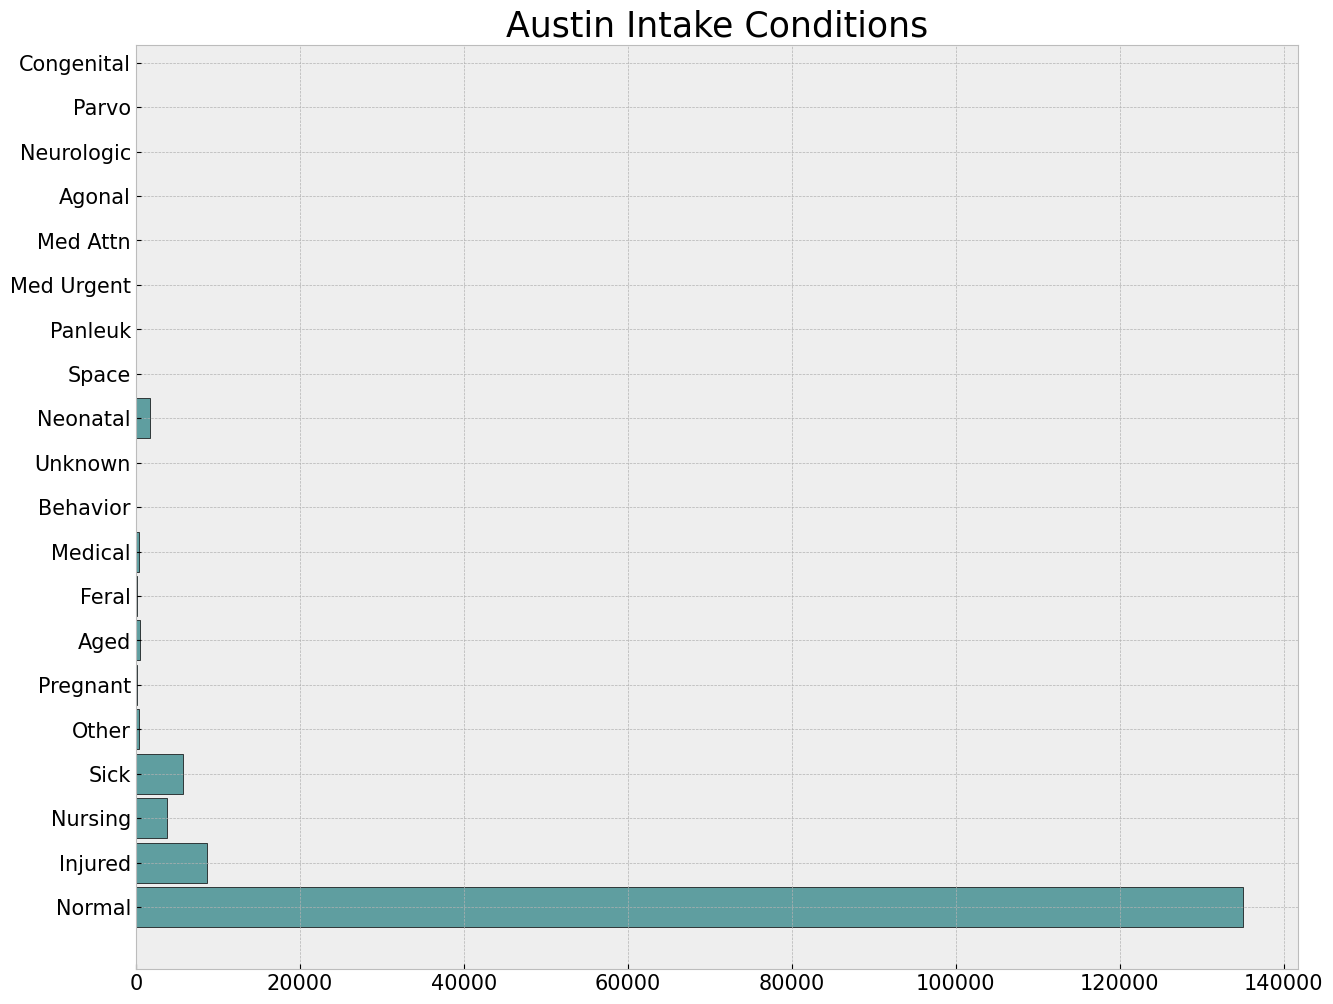

In [24]:
# plotting all intake conditions
plt.figure(figsize=(15, 12))
plt.hist(animals_austin['intake_condition'], bins='auto', edgecolor='black', orientation='horizontal', align='left', rwidth=0.9, color = 'cadetblue')
plt.title('Austin Intake Conditions', size=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

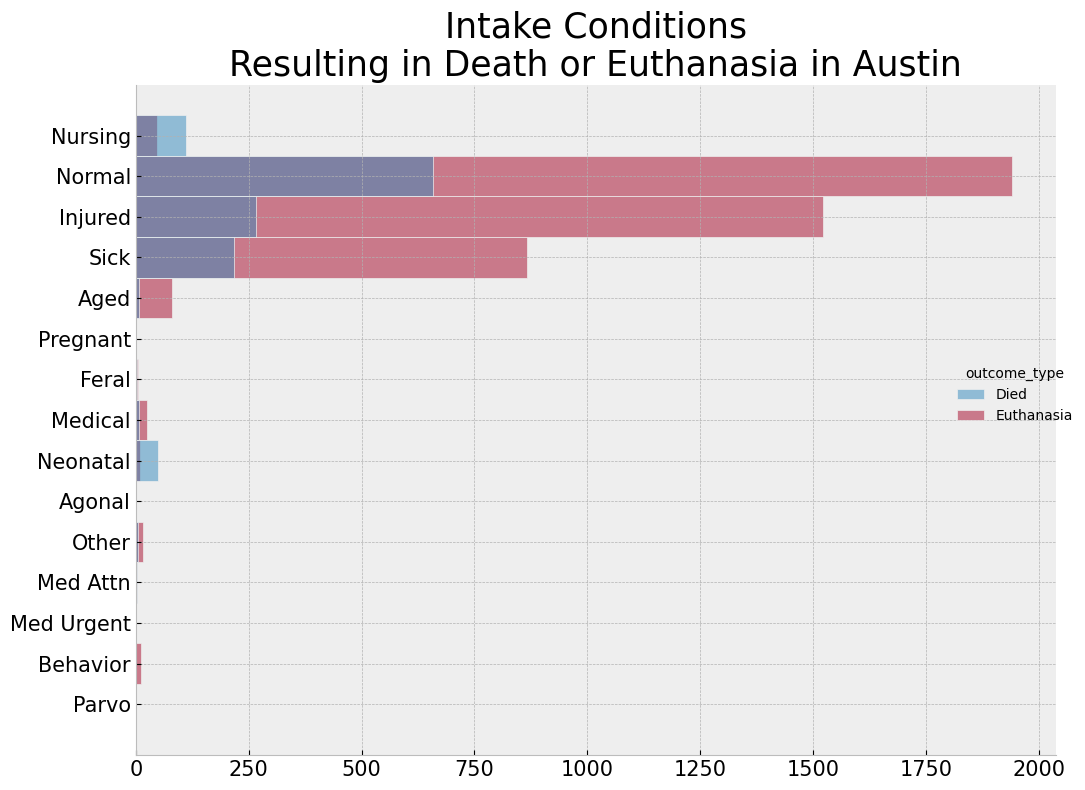

In [25]:
# plotting intake conditions with euthanasia and died outcomes
died_in_shelter_austin = pd.concat([animals_austin[animals_austin['outcome_type'] == 'Died'],
                             animals_austin[animals_austin['outcome_type'] == 'Euthanasia']])
sns.displot(died_in_shelter_austin, y = 'intake_condition', hue='outcome_type', height=8, aspect=1.2)
plt.title('Intake Conditions\nResulting in Death or Euthanasia in Austin', size = 25)
plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

# saving image for slides
plt.tight_layout()
plt.savefig('../images/conditions_euthanized_austin.png')

*There are still many animals that are euthanised or die while in the care of a shelter that are taken in with their condition reported as normal, but a larger percentage come in sick or injured compared to the other outcomes.*

In [26]:
# checking animals labeled with normal intake condition that died or were euthanized
animals_austin_normal_died = animals_austin[(animals_austin['intake_condition'] == 'Normal') & (animals_austin['outcome_type'] == 'Died')]
animals_austin_normal_euth = animals_austin[(animals_austin['intake_condition'] == 'Normal') & (animals_austin['outcome_type'] == 'Euthanasia')]

In [27]:
animals_austin_normal_died['animal_type'].value_counts(normalize = True)

animal_type
Cat    0.765601
Dog    0.234399
Name: proportion, dtype: float64

In [28]:
animals_austin_normal_euth['animal_type'].value_counts(normalize = True)

animal_type
Dog    0.607216
Cat    0.392784
Name: proportion, dtype: float64

In [29]:
animals_austin_normal_died['breed'].value_counts(normalize = True).head(10)

breed
Domestic Shorthair Mix      0.410959
Domestic Shorthair          0.228311
Domestic Medium Hair Mix    0.044140
Domestic Longhair Mix       0.022831
Chihuahua Shorthair Mix     0.019787
Pit Bull Mix                0.019787
Labrador Retriever Mix      0.016743
Domestic Medium Hair        0.015221
Labrador Retriever          0.012177
Siamese Mix                 0.012177
Name: proportion, dtype: float64

In [30]:
animals_austin_normal_euth['breed'].value_counts(normalize = True).head(10)

breed
Domestic Shorthair Mix       0.250000
Pit Bull Mix                 0.182474
Domestic Shorthair           0.064948
Labrador Retriever Mix       0.042268
Pit Bull                     0.035567
Domestic Medium Hair Mix     0.025258
Chihuahua Shorthair Mix      0.018557
German Shepherd Mix          0.018041
Domestic Longhair Mix        0.018041
Australian Cattle Dog Mix    0.012887
Name: proportion, dtype: float64

*A lot more cats die in the shelter with a normal intake condition but more dogs are euthanized.*

In [31]:
pit_bulls_normal = (animals_austin_normal_euth['breed'].value_counts(normalize = True).iloc[1] +
                    animals_austin_normal_euth['breed'].value_counts(normalize = True).iloc[4])
print(f'{round(pit_bulls_normal*100, 2)}% of pets euthanized in Austin shelters that appear healthy are Pit Bulls or a Pit Bull Mix')

21.8% of pets euthanized in Austin shelters that appear healthy are Pit Bulls or a Pit Bull Mix


In [32]:
# seeing number of found locations
len(animals_austin['found_location'].unique())

62699

*Over 50 thousand different locations where animals are found. Looking at the first few observations, many locations are very specific streets or crossroads. Not going to include as a feature for modeling.*

In [33]:
animals_austin.groupby(['outcome_type'])['outcome_gender'].value_counts(normalize=True)

outcome_type     outcome_gender
Adoption         Neutered Male     0.488355
                 Spayed Female     0.476488
                 Intact Female     0.018853
                 Intact Male       0.015998
                 Unknown           0.000306
Died             Intact Male       0.370482
                 Intact Female     0.306476
                 Unknown           0.150602
                 Neutered Male     0.087349
                 Spayed Female     0.085090
Disposal         Intact Male       0.325103
                 Unknown           0.288066
                 Intact Female     0.267490
                 Neutered Male     0.069959
                 Spayed Female     0.049383
Euthanasia       Intact Male       0.314254
                 Intact Female     0.260552
                 Neutered Male     0.200221
                 Spayed Female     0.125304
                 Unknown           0.099669
Lost             Intact Female     0.500000
                 Intact Male       0.500000


In [34]:
animals_austin['spay_neuter'].value_counts(normalize=True)

spay_neuter
0    0.568931
1    0.431069
Name: proportion, dtype: float64

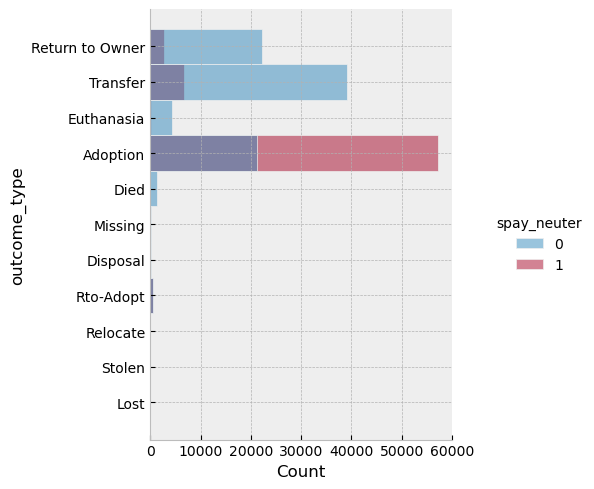

In [35]:
# seeing if spaying/neutering an animal affects their outcome
sns.displot(animals_austin, y = 'outcome_type', hue = 'spay_neuter');

*Very few pets returned to their owners are spayed or neutered which makes sense because they're likely to have already been fixed. There are many more pets that get fixed being adopted than the alternatives.*

In [36]:
# see the different intake types
animals_austin['intake_type'].value_counts()

intake_type
Stray                 112564
Owner Surrender        32865
Public Assist           9339
Abandoned               1653
Euthanasia Request       242
Wildlife                   1
Name: count, dtype: int64

In [37]:
# see conditions for animals taken in for euthanisia request
animals_austin[animals_austin['intake_type'] == 'Euthanasia Request']['intake_condition'].value_counts()

intake_condition
Sick          98
Normal        85
Aged          41
Injured       16
Other          1
Med Urgent     1
Name: count, dtype: int64

*Most animals taken in with a euthanasia request are listed with some sort of condition, looking at the few that are listed as normal.*

In [38]:
euth_request = animals_austin[animals_austin['intake_type'] == 'Euthanasia Request']
print(f"Outcomes for all incoming euthanasia requests: {euth_request['outcome_type'].value_counts()}")
print('='*50)
print(f"Outcomes for normal condition euthanasia requests: {euth_request[euth_request['intake_condition'] == 'Normal']['outcome_type'].value_counts()}")
print('='*50)
print(f"Breeds with normal condition euthanasia requests: {euth_request[euth_request['intake_condition'] == 'Normal']['breed'].value_counts()}")

Outcomes for all incoming euthanasia requests: outcome_type
Euthanasia         187
Transfer            33
Adoption            14
Return to Owner      5
Died                 3
Name: count, dtype: int64
Outcomes for normal condition euthanasia requests: outcome_type
Euthanasia         65
Transfer           12
Adoption            6
Return to Owner     2
Name: count, dtype: int64
Breeds with normal condition euthanasia requests: breed
Pit Bull Mix                              21
Domestic Shorthair Mix                    11
Labrador Retriever Mix                     9
Chihuahua Shorthair Mix                    5
Pit Bull                                   3
Miniature Poodle Mix                       2
German Shepherd Mix                        2
Boxer                                      1
Pit Bull/Australian Cattle Dog             1
Labrador Retriever/Beagle                  1
Dogo Argentino Mix                         1
Siamese Mix                                1
Rottweiler Mix           

In [39]:
pit_bulls = ((euth_request[euth_request['intake_condition'] == 'Normal']['breed'].value_counts().iloc[0]+
              euth_request[euth_request['intake_condition'] == 'Normal']['breed'].value_counts().iloc[4])/
             euth_request[euth_request['intake_condition'] == 'Normal']['breed'].value_counts().sum())
print(f'{round(pit_bulls*100, 2)}% of all pets brought in for euthanasia with a normal condition were Pit Bulls or a Pit Bull Mix.')

28.24% of all pets brought in for euthanasia with a normal condition were Pit Bulls or a Pit Bull Mix.


*There are some animals brought in as a euthanasia request with their condition labeled as normal that still end up getting adopted, transferred or returned to owner. The most common breeds overall are the most frequent here as well with Pit Bulls and Domestic Shorthairs.*

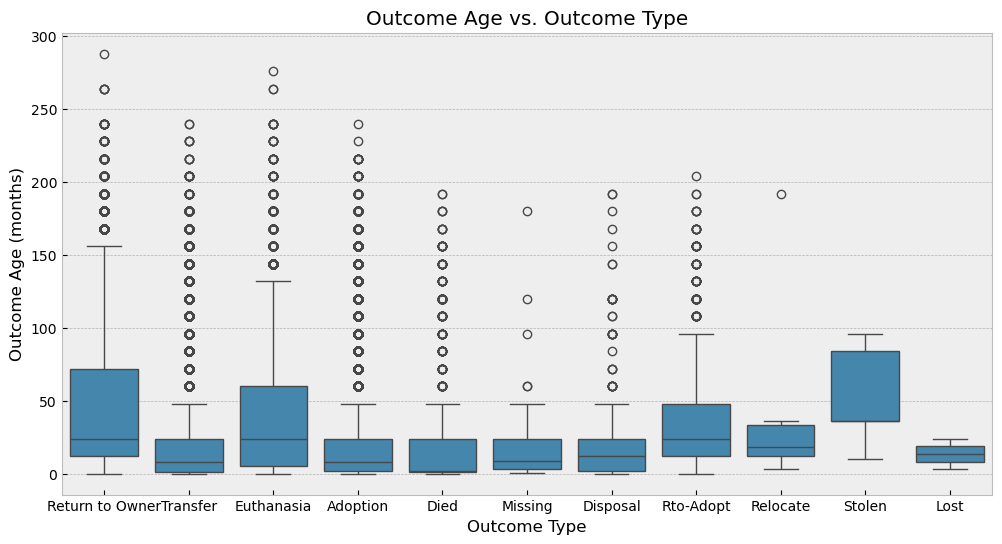

In [40]:
# see age for different outcomes
plt.figure(figsize=(12, 6))
sns.boxplot(x='outcome_type', y='outcome_age', data=animals_austin)
plt.title('Outcome Age vs. Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Outcome Age (months)');

*A lot of outliers with older pets, but for the most part adopted pets are younger than euthanized pets.*

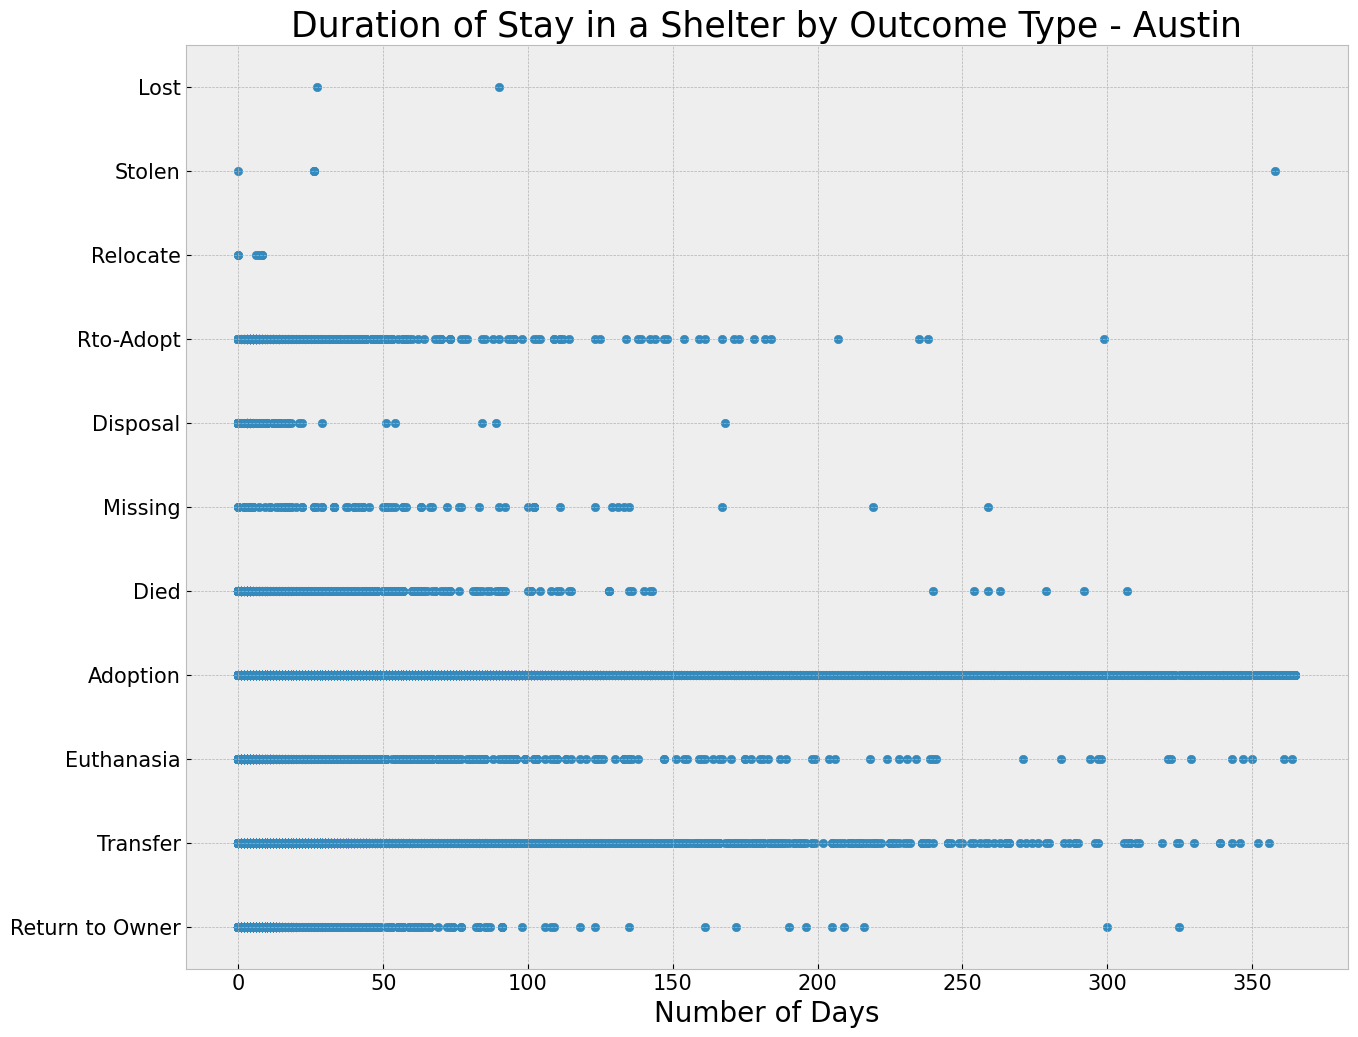

In [41]:
# plotting outcome by stay duration
plt.figure(figsize=(15, 12))
plt.scatter(animals_austin['stay_duration'], animals_austin['outcome_type'])
plt.title('Duration of Stay in a Shelter by Outcome Type - Austin', size = 25)
plt.xlabel('Number of Days', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

*There does not appear to be a correlation between how long a pet is in the shelter and them being adopted, there are pets being adopted within the entire year range.*

In [42]:
animals_austin['outcome_age'].value_counts(normalize=True)

outcome_age
24.00     0.152020
12.00     0.151317
2.00      0.141264
36.00     0.057269
3.00      0.055143
1.00      0.045097
4.00      0.036141
48.00     0.034188
60.00     0.031666
5.00      0.025169
6.00      0.022634
72.00     0.020675
84.00     0.018294
96.00     0.017988
0.69      0.017790
0.46      0.017649
8.00      0.015900
10.00     0.014605
120.00    0.014470
0.23      0.013870
7.00      0.013417
0.92      0.012836
9.00      0.010436
108.00    0.009926
144.00    0.007130
11.00     0.006728
132.00    0.005560
156.00    0.004519
0.10      0.003498
168.00    0.003223
0.07      0.003128
0.03      0.002987
180.00    0.002860
0.13      0.002030
0.20      0.001940
0.00      0.001519
1.15      0.001232
0.17      0.001226
192.00    0.001219
204.00    0.000677
216.00    0.000383
228.00    0.000185
240.00    0.000140
264.00    0.000038
288.00    0.000006
276.00    0.000006
Name: proportion, dtype: float64

In [43]:
animals_austin['intake_condition'].value_counts(normalize=True)

intake_condition
Normal        0.861902
Injured       0.055654
Sick          0.036498
Nursing       0.024083
Neonatal      0.010634
Aged          0.003255
Medical       0.002828
Other         0.002100
Pregnant      0.000957
Feral         0.000894
Behavior      0.000466
Med Attn      0.000377
Unknown       0.000102
Med Urgent    0.000089
Neurologic    0.000064
Parvo         0.000038
Space         0.000026
Agonal        0.000019
Panleuk       0.000006
Congenital    0.000006
Name: proportion, dtype: float64

In [44]:
animals_austin['intake_age'].value_counts()

intake_age
24.00     23786
12.00     23216
1.00      17320
2.00       9909
36.00      8837
0.92       5710
48.00      5399
0.69       4955
60.00      4900
3.00       4570
4.00       4484
5.00       3747
0.46       3481
72.00      3251
6.00       2872
84.00      2844
0.23       2745
96.00      2701
7.00       2398
9.00       2337
120.00     2182
8.00       1861
108.00     1582
10.00      1312
0.00       1114
11.00      1082
144.00     1069
0.03        949
132.00      886
0.10        865
0.07        708
156.00      695
168.00      502
0.13        447
0.20        444
180.00      439
1.15        428
0.17        229
192.00      187
204.00      103
216.00       59
228.00       29
240.00       22
264.00        6
288.00        1
276.00        1
Name: count, dtype: int64

In [45]:
animals_austin[animals_austin['animal_type'] == 'Cat']['breed'].value_counts(normalize=True)

breed
Domestic Shorthair Mix                      0.507744
Domestic Shorthair                          0.324933
Domestic Medium Hair Mix                    0.050314
Domestic Medium Hair                        0.029112
Domestic Longhair Mix                       0.025172
                                              ...   
Chartreux Mix                               0.000015
Japanese Bobtail/American Curl Shorthair    0.000015
Domestic Shorthair/Maine Coon               0.000015
Ocicat Mix                                  0.000015
Manx/Siamese                                0.000015
Name: proportion, Length: 109, dtype: float64

In [46]:
animals_austin[animals_austin['animal_type'] == 'Dog']['breed'].value_counts(normalize=True)

breed
Pit Bull Mix                             0.107457
Labrador Retriever Mix                   0.093319
Chihuahua Shorthair Mix                  0.075178
German Shepherd Mix                      0.043450
Pit Bull                                 0.034220
                                           ...   
Rat Terrier/American Pit Bull Terrier    0.000011
English Bulldog/American Bulldog         0.000011
Rhod Ridgeback/Harrier                   0.000011
Dachshund/Norfolk Terrier                0.000011
Brittany/Australian Shepherd             0.000011
Name: proportion, Length: 2607, dtype: float64

In [47]:
animals_austin['color'].value_counts(normalize=True)

color
Black/White          0.106444
Black                0.084755
Brown Tabby          0.064788
White                0.035515
Brown/White          0.033179
                       ...   
Tan/Cream Tabby      0.000006
Blue/Calico          0.000006
Tricolor/Cream       0.000006
Lilac Point/Black    0.000006
Ruddy                0.000006
Name: proportion, Length: 611, dtype: float64

In [48]:
animals_austin['stay_duration'].value_counts()

stay_duration
0      26291
4      14912
1       9383
3       9235
5       9219
       ...  
335        1
344        1
359        1
324        1
350        1
Name: count, Length: 366, dtype: int64

In [49]:
animals_austin['stay'].value_counts()

stay
1     139960
2      12830
3       2631
4        744
5        251
6        113
7         62
8         25
9         11
10         6
11         5
12         3
13         2
14         2
32         1
31         1
24         1
30         1
29         1
28         1
27         1
26         1
25         1
17         1
23         1
22         1
21         1
20         1
19         1
18         1
16         1
15         1
33         1
Name: count, dtype: int64

In [50]:
animals_austin['repeat'].value_counts()

repeat
0    127053
1     29611
Name: count, dtype: int64

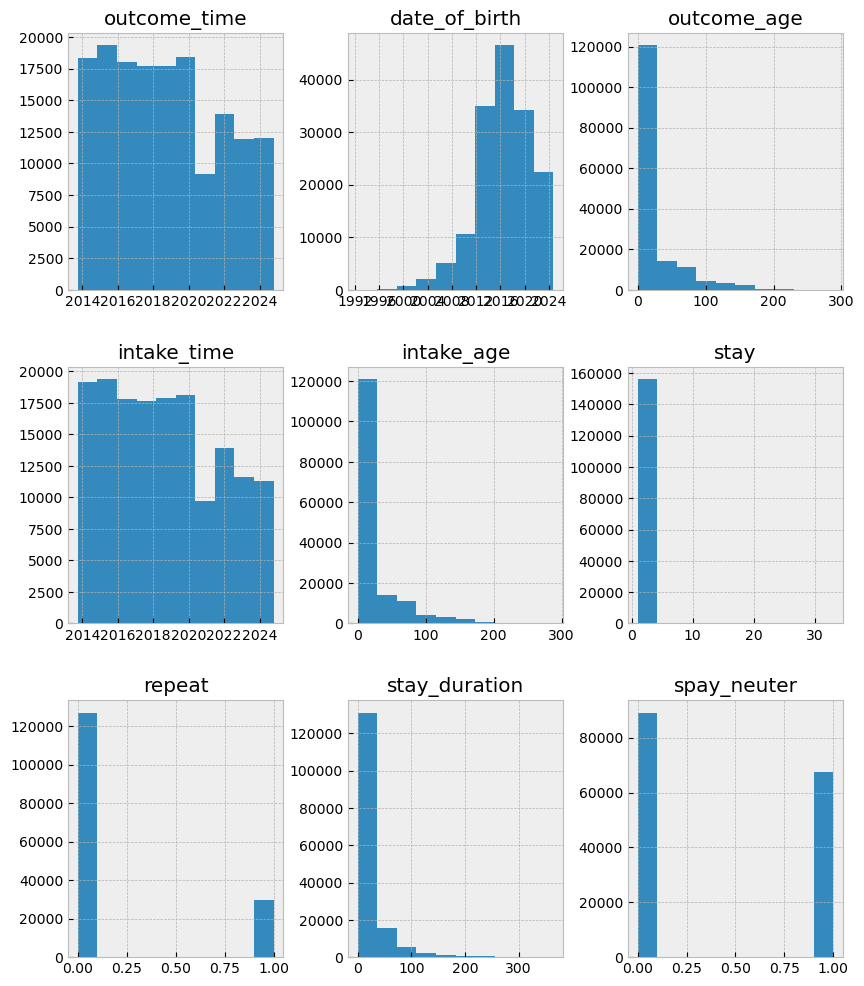

In [51]:
# quick check if any variables are normally distributed
animals_austin.hist(figsize=(10, 12));

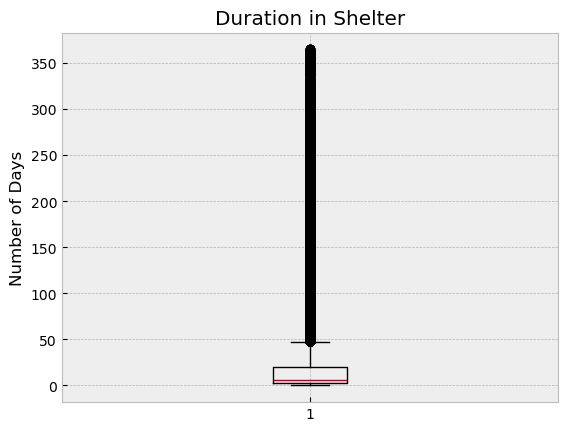

In [52]:
# checking stay duration for outliers
plt.boxplot(animals_austin['stay_duration'])
plt.title('Duration in Shelter')
plt.ylabel('Number of Days');

In [53]:
# check correlation matrix
animals_austin.corr(numeric_only=True)

,outcome_age,intake_age,stay,repeat,stay_duration,spay_neuter
outcome_age,1.000000,0.998809,0.107730,0.107172,0.022438,-0.294358
intake_age,0.998809,1.000000,0.107337,0.107376,0.004713,-0.300218
stay,0.107730,0.107337,1.000000,0.540634,0.014903,-0.199141
repeat,0.107172,0.107376,0.540634,1.000000,0.012847,-0.149212
stay_duration,0.022438,0.004713,0.014903,0.012847,1.000000,0.243358
spay_neuter,-0.294358,-0.300218,-0.199141,-0.149212,0.243358,1.000000


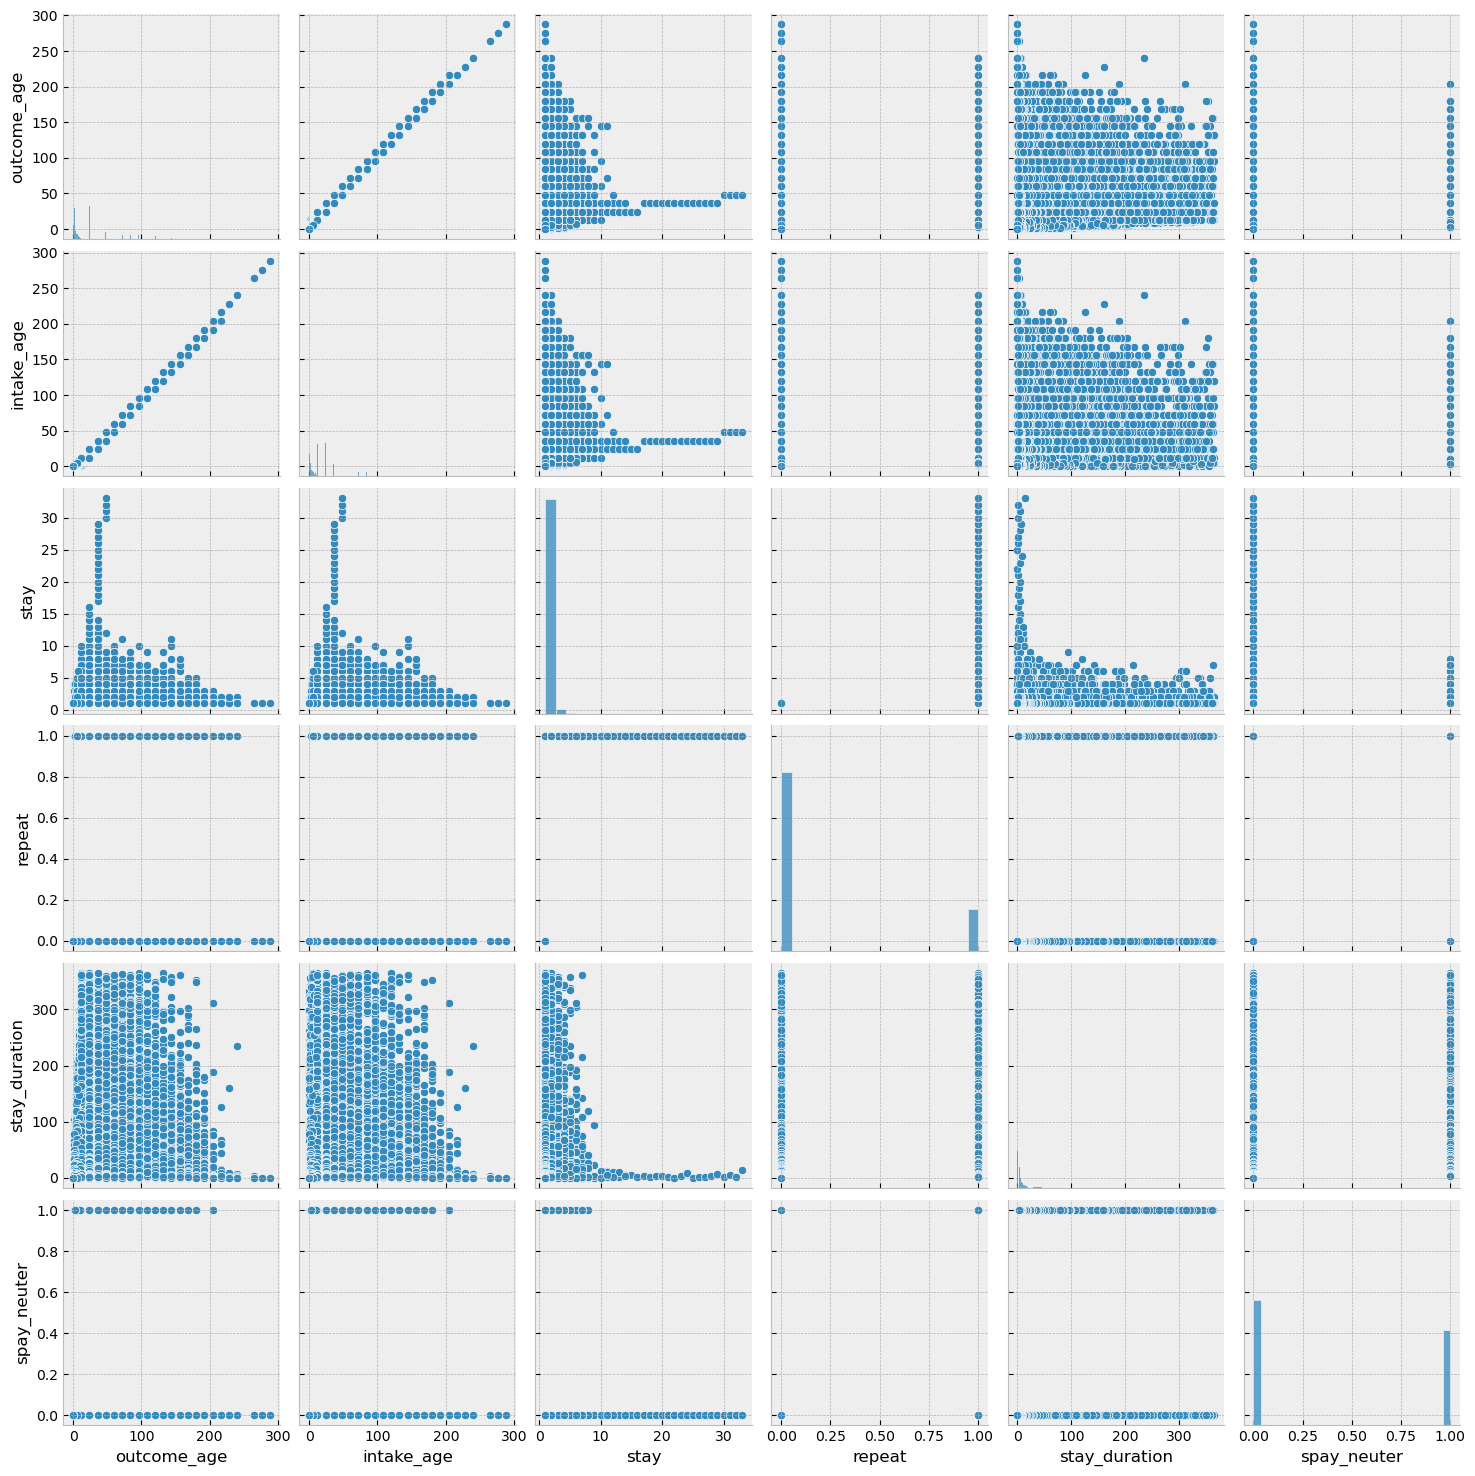

In [54]:
# checking pairplots as well
sns.pairplot(animals_austin);

##### Cats and Dogs
Aboout 90% of cats fall into one of five breeds that are mere descriptions of their hair.  There seems to be less importance made of a cats breed.  A theory is that cats are more individualistic and do not represent breed behaviors.

As a result, do we see cats have better success rates than dogs?

In [55]:
# how many cat and dog breeds
cat_breeds = animals_austin[animals_austin['animal_type'] == 'Cat']['breed']
dog_breeds = animals_austin[animals_austin['animal_type'] == 'Dog']['breed']

print(f'There are {cat_breeds.nunique()} cat breeds and {dog_breeds.nunique()} dog breeds.')

There are 109 cat breeds and 2607 dog breeds.


In [56]:
# Looking at success rates for cats and dogs
success = animals_austin[(animals_austin['outcome_type'] == 'Adoption') | (animals_austin['outcome_type'] == 'Return to Owner') | (animals_austin['outcome_type'] == 'Rto-Adopt')]
cat_success = success[success['animal_type'] == 'Cat']
dog_success = success[success['animal_type'] == 'Dog']
total_cats = len(animals_austin[animals_austin['animal_type'] == 'Cat'])
total_dogs = len(animals_austin[animals_austin['animal_type'] == 'Dog'])

print(f'Cats have had {len(cat_success)} successful rehomings, {round(len(cat_success)/total_cats*100, 2)}% of all cats.')
print(f'Dogs have had {len(dog_success)} successful rehomings, {round(len(dog_success)/total_dogs*100,2)}% of all dogs.')

Cats have had 36468 successful rehomings, 55.27% of all cats.
Dogs have had 68161 successful rehomings, 75.17% of all dogs.


In [57]:
# top ten breeds for success
breeds_success = success.groupby('breed')['animal_id'].count().sort_values(ascending=False)
breeds_success.head(10)

breed
Domestic Shorthair Mix       16938
Domestic Shorthair           12939
Pit Bull Mix                  7278
Labrador Retriever Mix        6497
Chihuahua Shorthair Mix       4876
German Shepherd Mix           3132
Pit Bull                      2397
Domestic Medium Hair Mix      1803
Australian Cattle Dog Mix     1493
German Shepherd               1408
Name: animal_id, dtype: int64

##### Repeat Animals
Some animals return to the shelters.  What is different about these animals


In [58]:
breeds_repeat = animals_austin.groupby('breed')['repeat'].count().sort_values(ascending=False)
breeds_repeat

breed
Domestic Shorthair Mix                      33504
Domestic Shorthair                          21441
Pit Bull Mix                                 9744
Labrador Retriever Mix                       8462
Chihuahua Shorthair Mix                      6817
                                            ...  
Norfolk Terrier/Cardigan Welsh Corgi            1
Norfolk Terrier/Chihuahua Longhair              1
Dachshund Longhair/Australian Cattle Dog        1
Norfolk Terrier/Dachshund                       1
Yorkshire Terrier/Yorkshire Terrier             1
Name: repeat, Length: 2716, dtype: int64

In [59]:
# converting outcome_type to binary classes
animals_austin['outcome_type_binary'] = animals_austin['outcome_type'].map(lambda x: 1 if x in ['Adoption', 'Return to Owner', 'Rto-Adopt'] else 0)

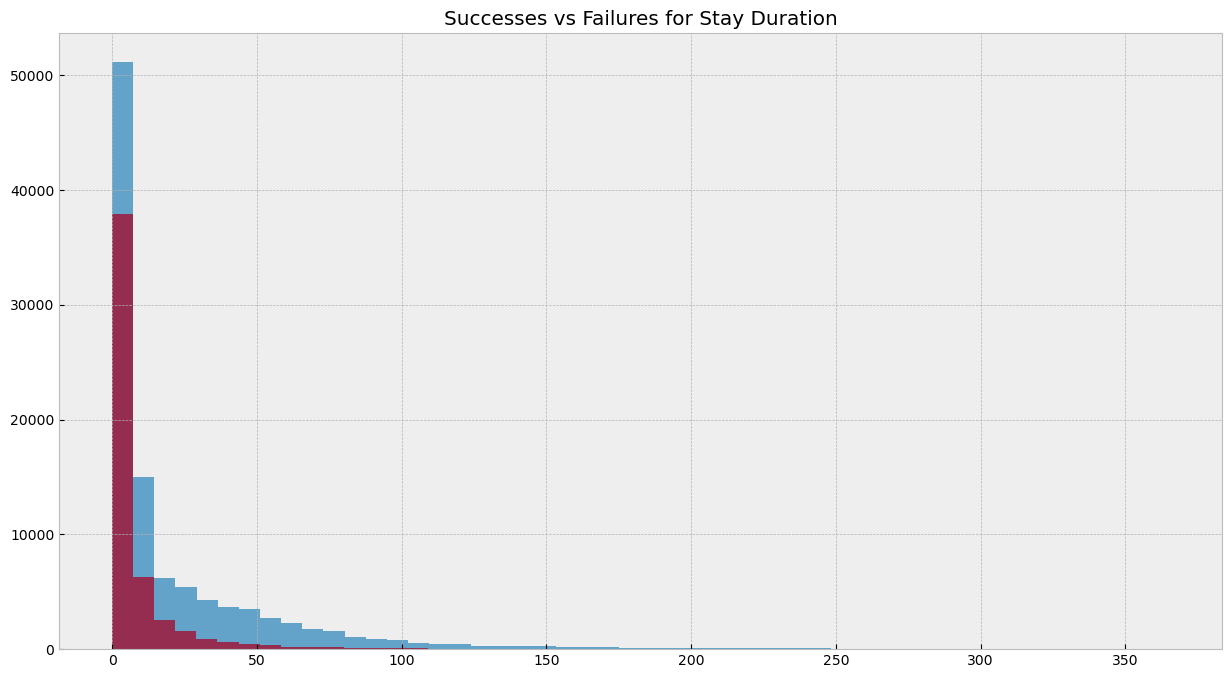

In [60]:
# replotting outcomes by stay duration with new binary class
plt.figure(figsize=(15, 8))
plt.hist(animals_austin[animals_austin['outcome_type_binary'] == 1]['stay_duration'], alpha = 0.75, bins = 50, label = 'successes')
plt.hist(animals_austin[animals_austin['outcome_type_binary'] == 0]['stay_duration'], alpha = 0.75, bins = 50, label = 'failures')
plt.title('Successes vs Failures for Stay Duration');

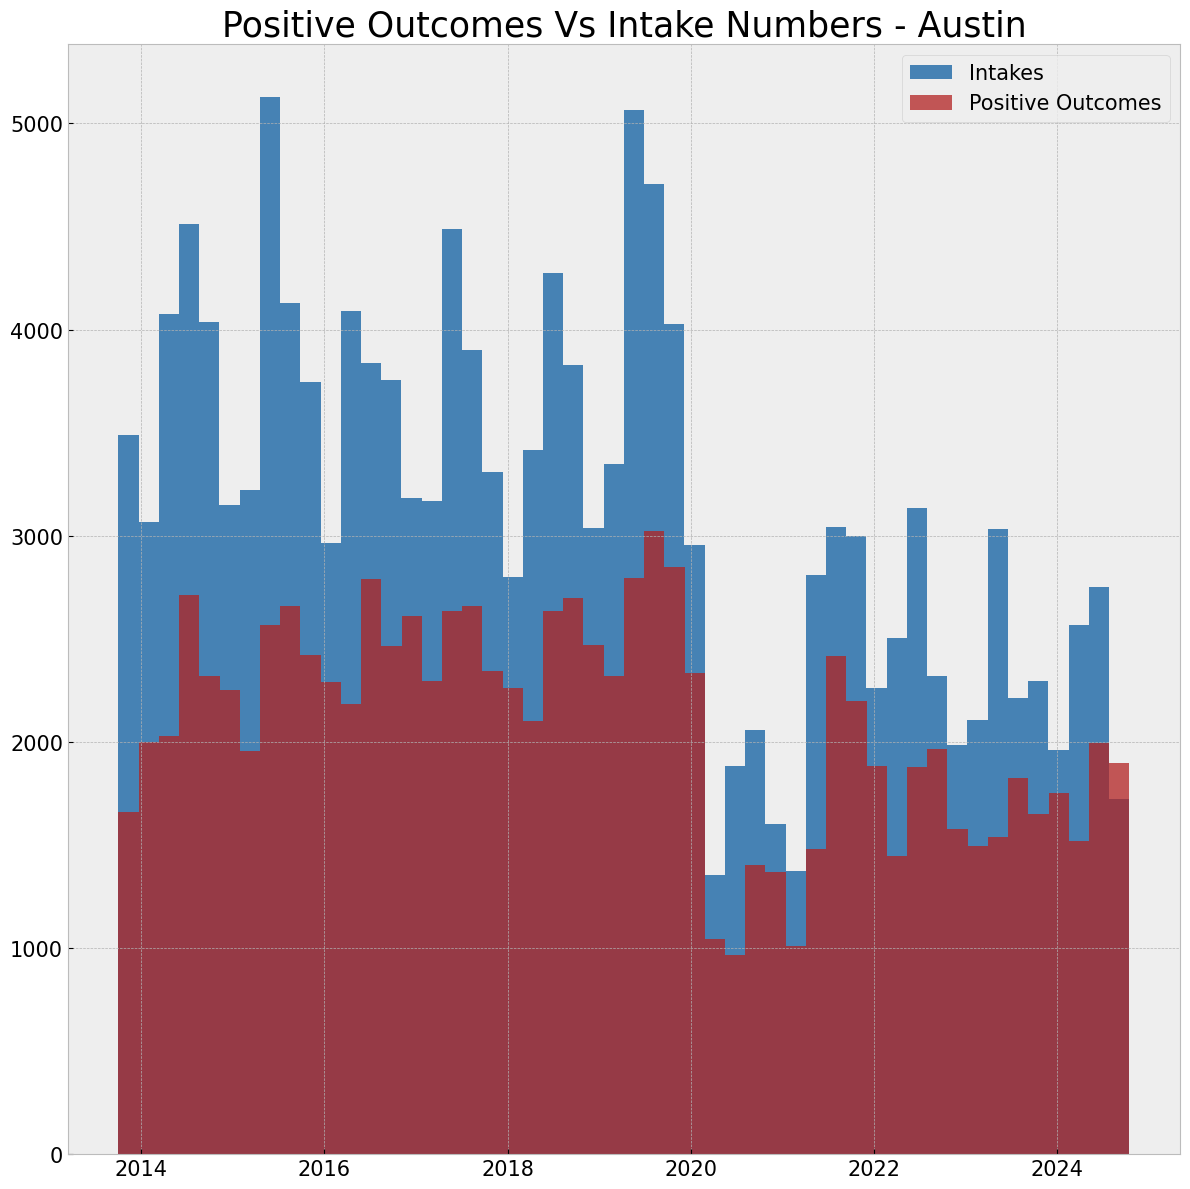

In [61]:
# filter for positive outcomes
positive_outcome_austin = animals_austin[animals_austin['outcome_type_binary'] == 1]

# plot intakes with positive outcomes
plt.figure(figsize = (12, 12))
plt.hist(animals_austin['intake_time'].dt.date,
         bins = 50, label = 'Intakes', color = 'steelblue')
plt.hist(positive_outcome_austin['outcome_time'].dt.date,
         bins = 50, alpha = 0.75, label = 'Positive Outcomes', color = 'firebrick')
plt.title('Positive Outcomes Vs Intake Numbers - Austin', size = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'best', prop = {'size': 15});

# saving figure for slides
plt.tight_layout()
plt.savefig('../images/posout_vs_intake_austin.png')

*The severe drop off in shelter intakes in 2020 makes sense, more people stayed home and either didn't drop off their pets or had pets escape. It also appears a lorger percentage of pet intakes resulted in a positive outcome after 2020, resultingin the first instance of more positive outcomes than intakes in the most recent.*

___
## Dallas

In [71]:
# read in dallas shelter data
animals_dallas = pd.read_csv('../data/dallas-combined-shelter-data.csv', parse_dates=['intake_date', 'outcome_date'])
animals_dallas.head()

,animal_id,animal_type,animal_breed,intake_type,reason,intake_date,intake_condition,outcome_type,outcome_date,outcome_condition,stay_duration
0,A1229376,CAT,DOMESTIC SH,DISPOS REQ,OTHRINTAKS,2024-10-04,DECEASED,DISPOSAL,2024-10-04,DECEASED,0
1,A1229851,DOG,MIXED BREED,STRAY,OTHRINTAKS,2024-10-09,APP WNL,ADOPTION,2024-10-27,APP WNL,18
2,A1225816,CAT,DOMESTIC SH,FOSTER,SURGERY,2024-10-26,APP WNL,ADOPTION,2024-10-27,APP WNL,1
3,A1204135,DOG,MIXED BREED,FOSTER,FOR ADOPT,2024-10-27,APP WNL,ADOPTION,2024-10-27,APP WNL,0
4,A1231147,DOG,CHIHUAHUA SH,OWNER SURRENDER,PERSNLISSU,2024-10-24,APP WNL,ADOPTION,2024-10-27,APP WNL,3


In [72]:
# sort data by ascending intake
animals_dallas.sort_values(by = 'intake_date', inplace = True)

In [73]:
animals_dallas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255728 entries, 255727 to 70
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   animal_id          255728 non-null  object        
 1   animal_type        255728 non-null  object        
 2   animal_breed       255728 non-null  object        
 3   intake_type        255728 non-null  object        
 4   reason             255728 non-null  object        
 5   intake_date        255728 non-null  datetime64[ns]
 6   intake_condition   255728 non-null  object        
 7   outcome_type       255728 non-null  object        
 8   outcome_date       255728 non-null  datetime64[ns]
 9   outcome_condition  255728 non-null  object        
 10  stay_duration      255728 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 23.4+ MB


In [74]:
animals_dallas.describe()

,intake_date,outcome_date,stay_duration
count,255728,255728,255728.000000
mean,2019-08-13 02:21:27.693174016,2019-08-22 00:03:13.255334144,8.904000
min,2014-10-01 00:00:00,2014-10-01 00:00:00,0.000000
25%,2017-03-13 00:00:00,2017-03-19 00:00:00,1.000000
50%,2019-04-28 00:00:00,2019-05-04 00:00:00,4.000000
75%,2022-04-14 00:00:00,2022-04-27 00:00:00,11.000000
max,2024-10-27 00:00:00,2024-10-27 00:00:00,663.000000
std,NaN,NaN,15.115934


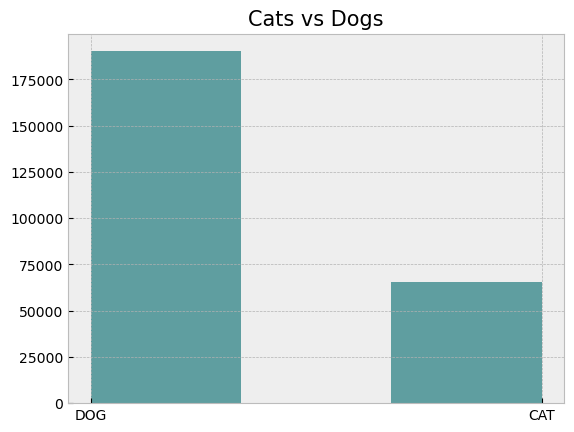

In [75]:
# Seeing total counts for cats and dogs
plt.hist(animals_dallas['animal_type'], bins = 3, color = 'cadetblue')
plt.title('Cats vs Dogs', size = 15);

*Significantly more dogs than cats in Dallas shelters compared to shelters in Austin.*

In [76]:
# how many pets taken in each year
year_outcomes_dallas = animals_dallas['animal_id'].groupby(animals_dallas['outcome_date'].dt.year).count()
year_outcomes_dallas

outcome_date
2014     5869
2015    26384
2016    26563
2017    29053
2018    29581
2019    33504
2020    17708
2021    17151
2022    20671
2023    23874
2024    25370
Name: animal_id, dtype: int64

In [77]:
# count how many cats and dogs successfully rehomed
success_dallas = animals_dallas[(animals_dallas['outcome_type'] == 'ADOPTION') | (animals_dallas['outcome_type'] == 'RETURNED TO OWNER') | (animals_dallas['outcome_type'] == 'FOSTER')]
year_success_dallas = success_dallas['animal_id'].groupby(animals_dallas['outcome_date'].dt.year).count()
year_success_dallas

outcome_date
2014     1795
2015     8036
2016     8465
2017    11790
2018    15088
2019    19440
2020     9655
2021     8870
2022     9566
2023     9898
2024    12707
Name: animal_id, dtype: int64

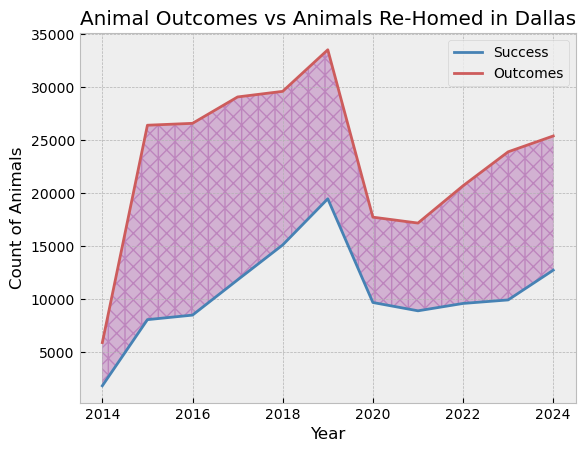

In [78]:
# visualize success vs failures
fig, ax = plt.subplots()
ax.plot(year_success_dallas.index, year_success_dallas.values, color='steelblue', label='Success')
ax.plot(year_outcomes_dallas.index, year_outcomes_dallas.values, color='indianred', label='Outcomes')

ax.fill_between(year_success_dallas.index, year_success_dallas, year_outcomes_dallas, alpha=0.25, color='purple', hatch='/\\/\\|')
ax.set_title('Animal Outcomes vs Animals Re-Homed in Dallas')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Animals')
ax.legend(loc='best')

plt.show();

# saving image for slides
fig.tight_layout()
fig.savefig('../images/compare_outcomes_dallas.png')

In [79]:
# most common breeds
animals_dallas['animal_breed'].value_counts().head(10)

animal_breed
DOMESTIC SH      56262
PIT BULL         35092
MIXED BREED      24347
GERM SHEPHERD    20968
CHIHUAHUA SH     20279
LABRADOR RETR    19604
DOMESTIC MH       4302
CAIRN TERRIER     4175
ALASKAN HUSKY     3176
ROTTWEILER        3023
Name: count, dtype: int64

In [80]:

# breakdown of intakes
bd_intakes_dallas = animals_dallas['intake_type'].value_counts(normalize=True)
bd_intakes_dallas

intake_type
STRAY              0.605894
OWNER SURRENDER    0.233021
FOSTER             0.070133
CONFISCATED        0.041071
TREATMENT          0.013276
LOST REPORT        0.012150
KEEPSAFE           0.006429
TRANSFER           0.005478
FOUND REPORT       0.004470
TNR                0.004106
RESOURCE           0.002839
DISPOS REQ         0.001134
Name: proportion, dtype: float64

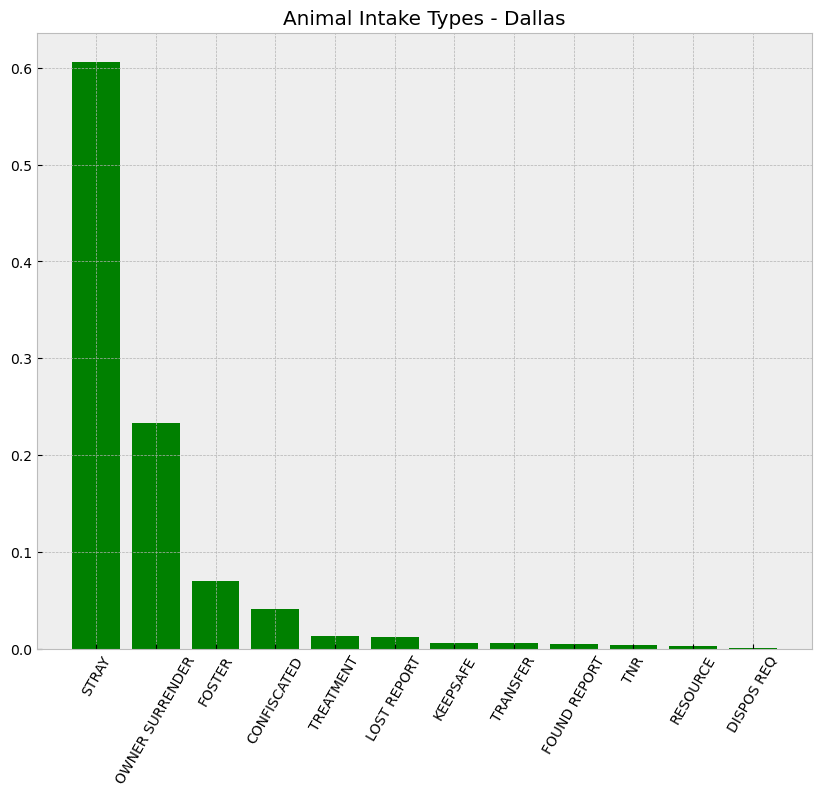

In [81]:
# visualize the breakdown of intakes
plt.figure(figsize = (10, 8))
plt.bar(x=bd_intakes_dallas.index, height=bd_intakes_dallas.values, color='green')

plt.title('Animal Intake Types - Dallas')
plt.xticks(rotation = 60)

plt.show();

*Similar to Austin, the majority of intakes are strays.*

In [82]:
# breakdown of outcomes
bd_outcomes_dallas = animals_dallas['outcome_type'].value_counts(normalize=True)
bd_outcomes_dallas

outcome_type
ADOPTION             0.306525
EUTHANIZED           0.223605
TRANSFER             0.193745
RETURNED TO OWNER    0.139238
LOST EXP             0.052759
FOUND EXP            0.016658
TREATMENT            0.013272
DIED                 0.012861
LOST REPORT          0.012263
DEAD ON ARRIVAL      0.007058
FOSTER               0.005146
FOUND REPORT         0.004352
TNR                  0.003449
DISPOSAL             0.003285
CLOSED               0.002839
SNR                  0.001994
MISSING              0.000915
OTHER                0.000035
Name: proportion, dtype: float64

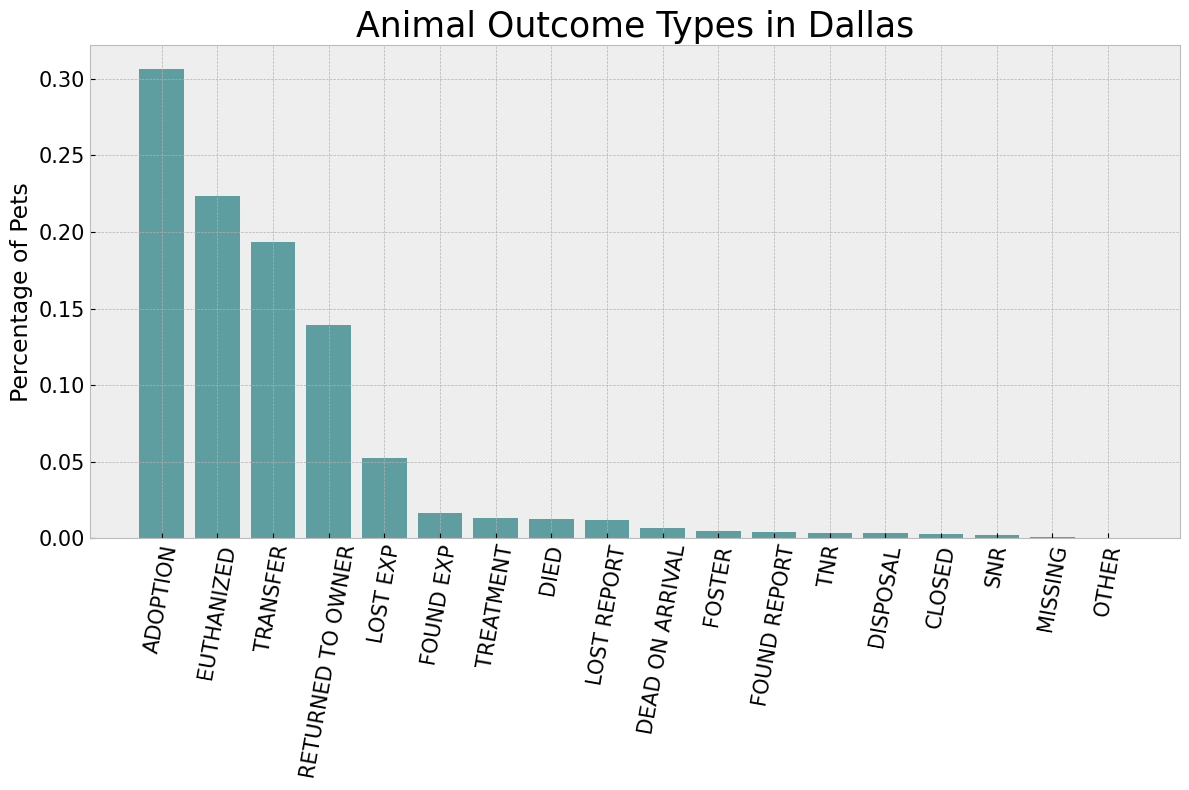

In [83]:
# visualize the breakdown of outcomes
plt.figure(figsize = (12, 8))
plt.bar(x=bd_outcomes_dallas.index, height=bd_outcomes_dallas.values, color = 'cadetblue')

plt.title('Animal Outcome Types in Dallas', size = 25)
plt.xticks(rotation = 80, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Percentage of Pets', size = 17);

# saving plot for slides
plt.tight_layout()
plt.savefig('../images/all_outcomes_dallas.png')

*A much larger percentage of pets are euthanized in Dallas compared to Austin.*

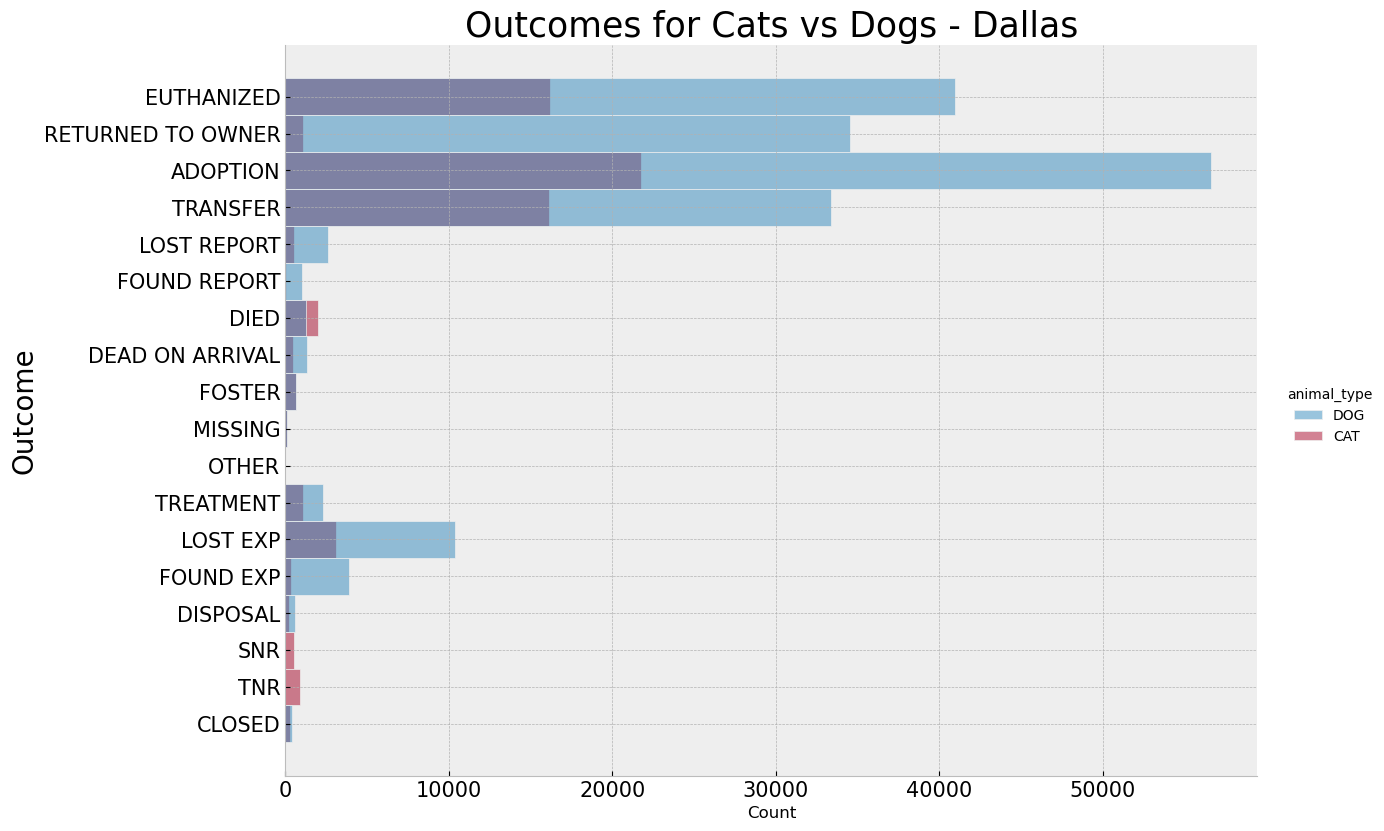

In [84]:
# show distribution of cats vs dogs for each outcome
sns.displot(animals_dallas, y='outcome_type', hue='animal_type', height=8, aspect=1.5)
plt.title('Outcomes for Cats vs Dogs - Dallas', size=25)
plt.ylabel('Outcome', size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

*The percentage of dogs compared to cats in Dallas shelters is higher than in Austin, so this visual not as insightful.*

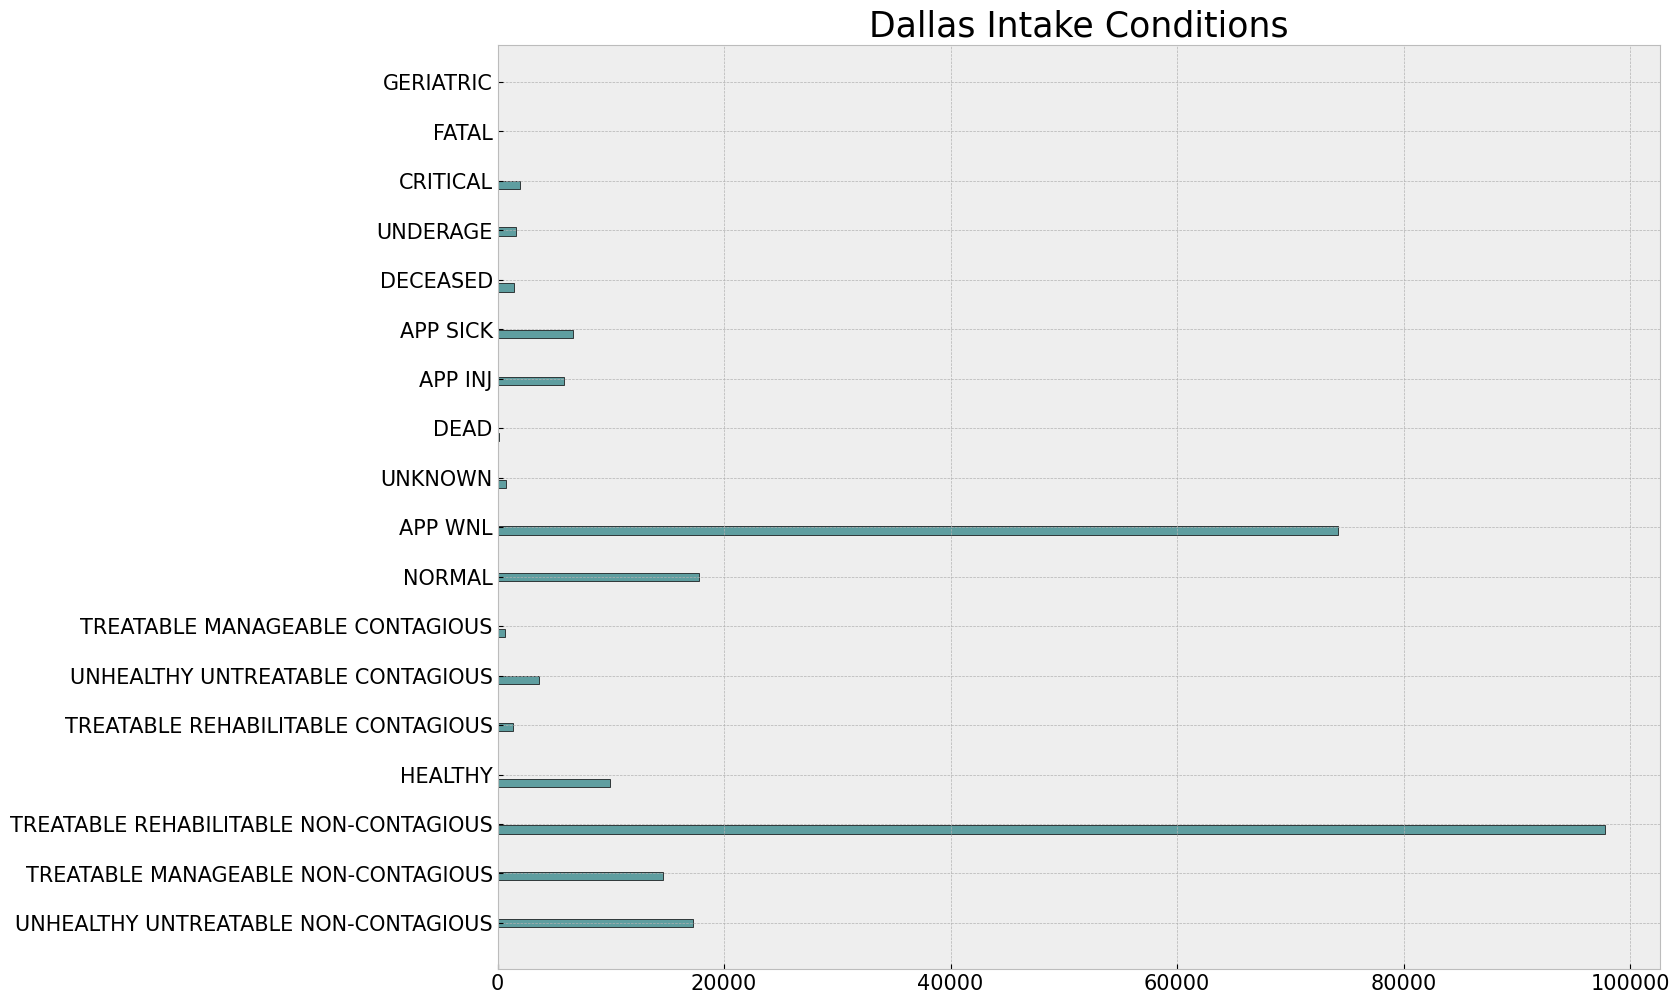

In [85]:
# plotting all intake conditions
plt.figure(figsize=(15, 12))
plt.hist(animals_dallas['intake_condition'], bins='auto', edgecolor='black', orientation='horizontal', align='left', rwidth=0.9, color = 'cadetblue')
plt.title('Dallas Intake Conditions', size=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

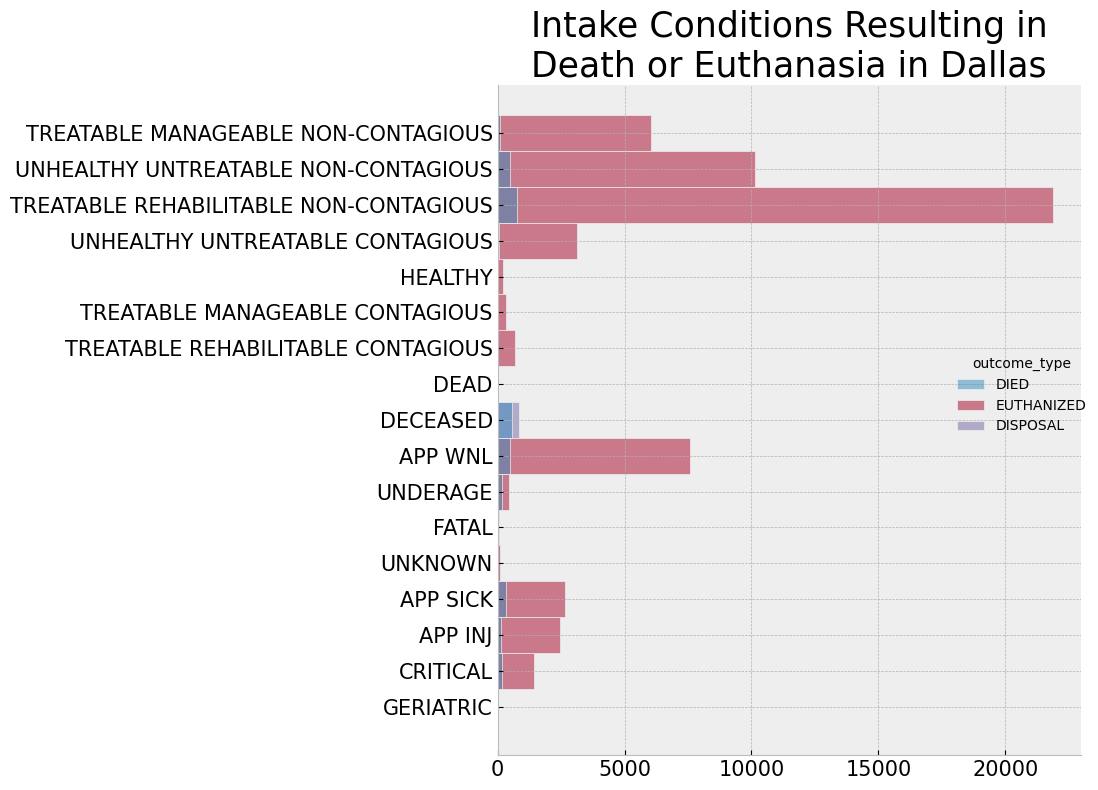

In [86]:
# plotting intake conditions with euthanasia and died outcomes
died_in_shelter_dallas = pd.concat([animals_dallas[animals_dallas['outcome_type'] == 'DIED'],
                                   animals_dallas[animals_dallas['outcome_type'] == 'EUTHANIZED'],
                                   animals_dallas[animals_dallas['outcome_type'] == 'DISPOSAL']])
sns.displot(died_in_shelter_dallas, y = 'intake_condition', hue='outcome_type', height=8, aspect=1.2)
plt.title('Intake Conditions Resulting in\nDeath or Euthanasia in Dallas', size = 25)
plt.ylabel('')
plt.xlabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15);

# saving image for slides
plt.tight_layout()
plt.savefig('../images/conditions_euthanized_dallas.png')

*The normal condition here is labeled as 'APP WNL' (appears within normal limits). This represents a smaller percentage of animals being euthanized than animals in Austin that are labeled as normal, but there are many animals listed with treatbable conditions being euthanized in Dallas.*

In [87]:
# seeing animals the animals with normal conditions that die or are euthanized
animals_dallas_normal_died = animals_dallas[(animals_dallas['intake_condition'] == 'APP WNL') & (animals_dallas['outcome_type'] == 'DIED')]
animals_dallas_normal_euth = animals_dallas[(animals_dallas['intake_condition'] == 'APP WNL') & (animals_dallas['outcome_type'] == 'EUTHANIZED')]

In [88]:
animals_dallas_normal_died['animal_breed'].value_counts(normalize = True).head(10)

animal_breed
DOMESTIC SH      0.475789
MIXED BREED      0.305263
PIT BULL         0.067368
GERM SHEPHERD    0.029474
LABRADOR RETR    0.027368
ROTTWEILER       0.010526
DOMESTIC MH      0.010526
CHIHUAHUA SH     0.008421
CANE CORSO       0.006316
CATAHOULA        0.004211
Name: proportion, dtype: float64

In [89]:
animals_dallas_normal_euth['animal_breed'].value_counts(normalize = True).head(10)

animal_breed
MIXED BREED        0.379046
PIT BULL           0.229885
DOMESTIC SH        0.091161
GERM SHEPHERD      0.076100
LABRADOR RETR      0.056150
AM PIT BULL TER    0.016383
ALASKAN HUSKY      0.013608
ROTTWEILER         0.009248
AUST CATTLE DOG    0.008720
CHIHUAHUA SH       0.008588
Name: proportion, dtype: float64

In [90]:
pit_bulls_dallas = animals_dallas_normal_euth['animal_breed'].value_counts(normalize = True).iloc[1]
print(f'{round(pit_bulls_dallas*100, 2)}% of pets euthanized in Dallas shelters that appear healthy are Pit Bulls')

22.99% of pets euthanized in Dallas shelters that appear healthy are Pit Bulls


*Similar to Austin, Pit Bulls top the breeds that are euthanized even with normal health.*

In [91]:
animals_dallas.head()

,animal_id,animal_type,animal_breed,intake_type,reason,intake_date,intake_condition,outcome_type,outcome_date,outcome_condition,stay_duration
255727,A0851612,DOG,BOXER,OWNER SURRENDER,AGGRESSIVE - PEOPLE,2014-10-01,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,EUTHANIZED,2014-10-01,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,0
255227,A0859453,DOG,CHINESE SHARPEI,STRAY,NONE,2014-10-01,TREATABLE MANAGEABLE NON-CONTAGIOUS,EUTHANIZED,2014-10-13,TREATABLE MANAGEABLE NON-CONTAGIOUS,12
255254,A0859512,DOG,MASTIFF,CONFISCATED,NONE,2014-10-01,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,RETURNED TO OWNER,2014-10-13,TREATABLE REHABILITABLE NON-CONTAGIOUS,12
254833,A0859456,DOG,LABRADOR RETR,STRAY,NONE,2014-10-01,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,2014-10-19,TREATABLE REHABILITABLE NON-CONTAGIOUS,18
254832,A0859463,DOG,CHIHUAHUA SH,OWNER SURRENDER,WARRANT,2014-10-01,TREATABLE REHABILITABLE NON-CONTAGIOUS,ADOPTION,2014-10-19,TREATABLE REHABILITABLE NON-CONTAGIOUS,18


In [92]:
animals_dallas['reason'].value_counts(normalize = True).head(10)

reason
NONE             0.471783
OTHRINTAKS       0.243004
OTHER            0.062351
MEDICAL          0.020729
FOR ADOPT        0.020330
PERSNLISSU       0.019392
HOUSING          0.017906
BEHAVIOR         0.016459
TOO MANY         0.016068
OWNER PROBLEM    0.010218
Name: proportion, dtype: float64

*Most pets being taken in by Dallas shelters don't have an intake reason. This makes sense because most came in as strays.*

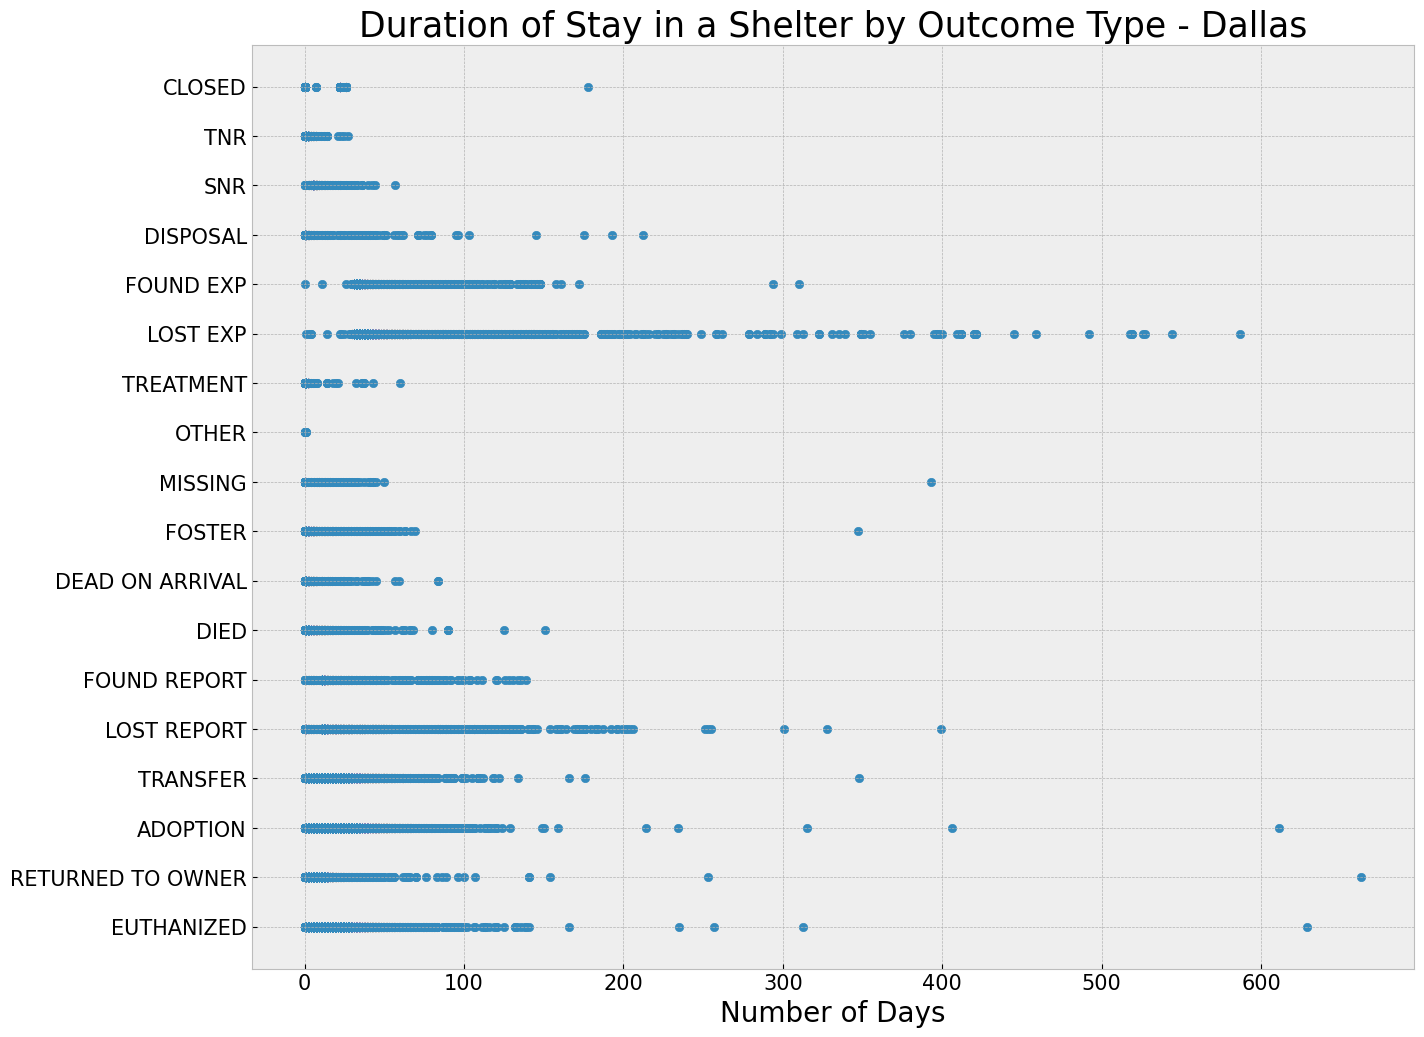

In [93]:
# plotting outcome by stay duration
plt.figure(figsize=(15, 12))
plt.scatter(animals_dallas['stay_duration'], animals_dallas['outcome_type'])
plt.title('Duration of Stay in a Shelter by Outcome Type - Dallas', size = 25)
plt.xlabel('Number of Days', size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [94]:
# converting outcome_type to binary classes
animals_dallas['outcome_type'] = animals_dallas['outcome_type'].map(lambda x: 1 if x in ['ADOPTION', 'RETURNED TO OWNER', 'FOSTER'] else 0)

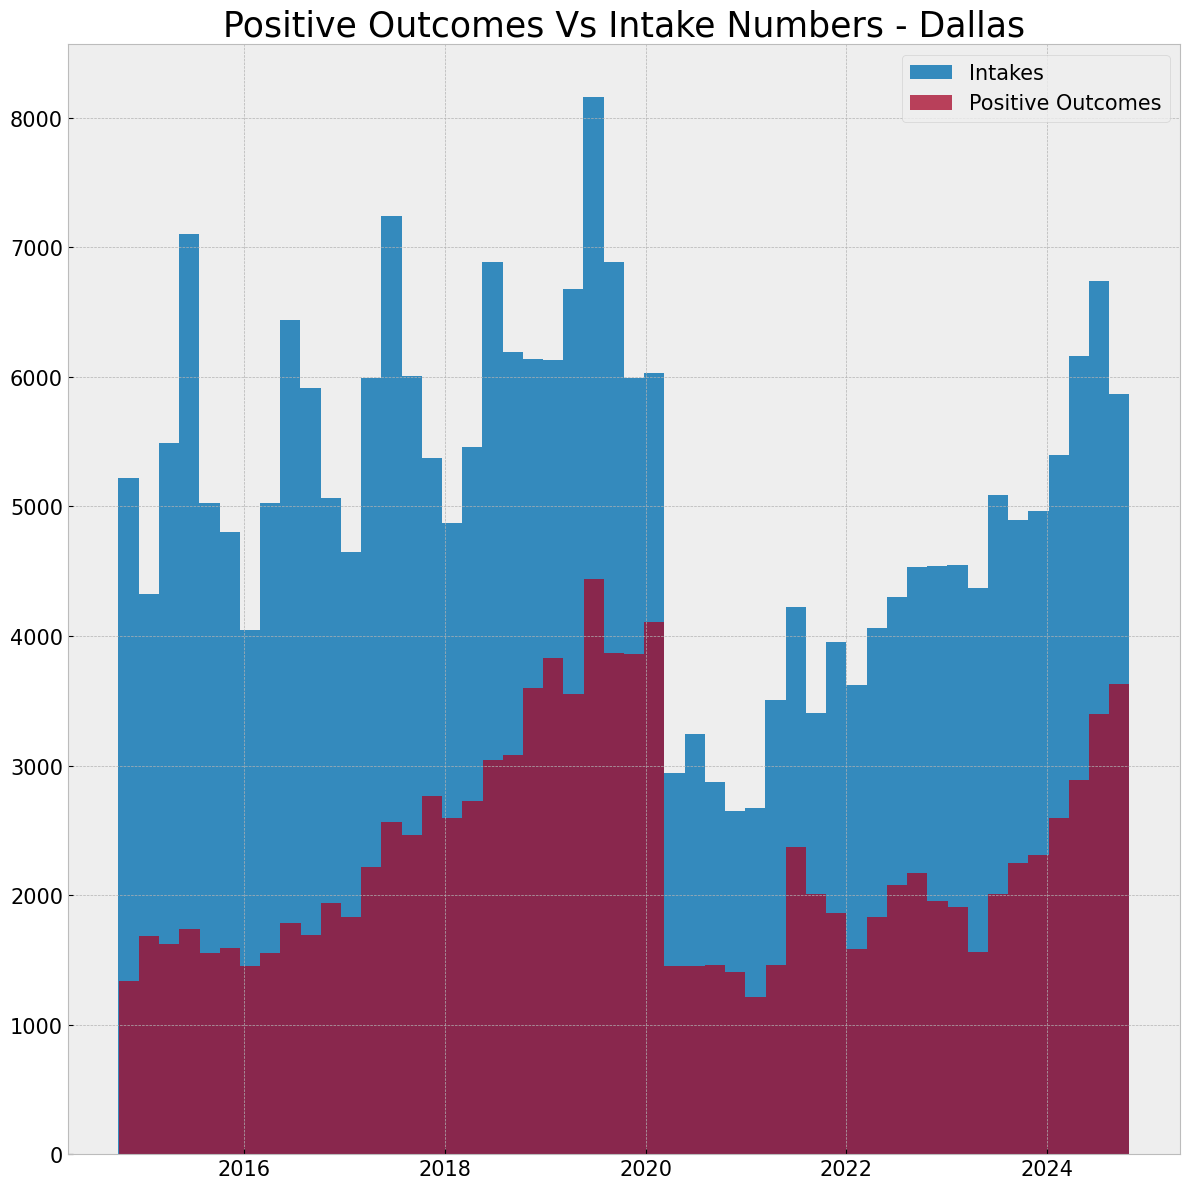

In [95]:
# filter for positive outcomes
positive_outcome_dallas = animals_dallas[animals_dallas['outcome_type'] == 1]

# plot intakes with positive outcomes
plt.figure(figsize = (12, 12))
plt.hist(animals_dallas['intake_date'].dt.date, bins = 50, label = 'Intakes')
plt.hist(positive_outcome_dallas['outcome_date'].dt.date, bins = 50, alpha = 0.75, label = 'Positive Outcomes')
plt.title('Positive Outcomes Vs Intake Numbers - Dallas', size = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'best', prop = {'size': 15});

# saving figure for slides
plt.tight_layout()
plt.savefig('../images/posout_vs_intake_dallas.png')

*Dallas also experienced the significant decrease in intakes in 2020. They didn't see as much of an increase in percentage of positive outcomes after 2020, but there weren't as much fluctuation in intake numbers as before 2020.*